<a href="https://colab.research.google.com/github/Zircornn-Black/Canvas---dsc-phase-2-project-v2-3/blob/main/Final_Phase_4_project_G6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Objectives:
1.	Understand Household Electricity Consumption Patterns: The primary objective of this project is to gain insights into the household's electricity consumption patterns over time. This includes analyzing the trends, seasonality, and any other relevant patterns in the various electricity-related variables.
2.	Identify Factors Influencing Electricity Consumption: The project aims to identify the key factors that influence the household's electricity consumption, such as time of day, day of the week, seasons, and the usage of specific appliances (sub-metering data).
3.	Develop Predictive Models: Using the time series data, the project may involve developing predictive models to forecast future electricity consumption patterns. This could help the household better manage its energy usage and costs.
4.	Optimize Energy Efficiency: The insights gained from the analysis can be used to identify opportunities for improving energy efficiency within the household, such as identifying high-consumption appliances or periods of the day/week with peak demand.
Potential Business Applications:
1.	Household Energy Management: The analysis can help the household better understand its energy consumption patterns and make informed decisions to optimize energy usage and reduce costs.
2.	Utility Company Insights: The project's findings could provide valuable insights to utility companies about residential electricity consumption patterns, which could aid in grid management, demand forecasting, and the development of targeted energy efficiency programs.
3.	Energy Policy and Planning: The project's insights could contribute to the development of energy policies and planning initiatives that aim to promote energy efficiency and sustainability at the household and community levels.
4.	Research and Development: The dataset and analysis could be used for further research and development in the areas of smart home technologies, energy management systems, and the optimization of household energy consumption.
Overall, this time series project on household electricity consumption has the potential to provide valuable insights that can benefit the household, utility companies, policymakers, and researchers in the energy and sustainability domains.

# Data Understanding and Loading

In [ ]:
from google.colab import drive

# Use the 'force_remount=True' argument to remount the drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Importing libraries
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#Data Loading
df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

<ipython-input-47-2f40051c7c9e>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
<ipython-input-47-2f40051c7c9e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',


In [ ]:
# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime']) # Fixed indentation
    df.set_index('Datetime', inplace=True)


In [ ]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.shape

(2075259, 7)

In [ ]:
df.describe().T

count        mean       std      min      25%  \
Global_active_power    2049280.0    1.091615  1.057294    0.076    0.308   
Global_reactive_power  2049280.0    0.123714  0.112722    0.000    0.048   
Voltage                2049280.0  240.839858  3.239987  223.200  238.990   
Global_intensity       2049280.0    4.627759  4.444396    0.200    1.400   
Sub_metering_1         2049280.0    1.121923  6.153031    0.000    0.000   
Sub_metering_2         2049280.0    1.298520  5.822026    0.000    0.000   
Sub_metering_3         2049280.0    6.458447  8.437154    0.000    0.000   

                           50%      75%      max  
Global_active_power      0.602    1.528   11.122  
Global_reactive_power    0.100    0.194    1.390  
Voltage                241.010  242.890  254.150  
Global_intensity         2.600    6.400   48.400  
Sub_metering_1           0.000    0.000   88.000  
Sub_metering_2           0.000    1.000   80.000  
Sub_metering_3           1.000   17.000   31.000

# Data Cleaning

In [ ]:
#Checking for missing values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Checking for duplicates
df.duplicated().sum()

168560

In [ ]:
#Checking for missing values
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Fill missing values with mean
df['Global_active_power'].fillna(method='ffill', inplace=True)


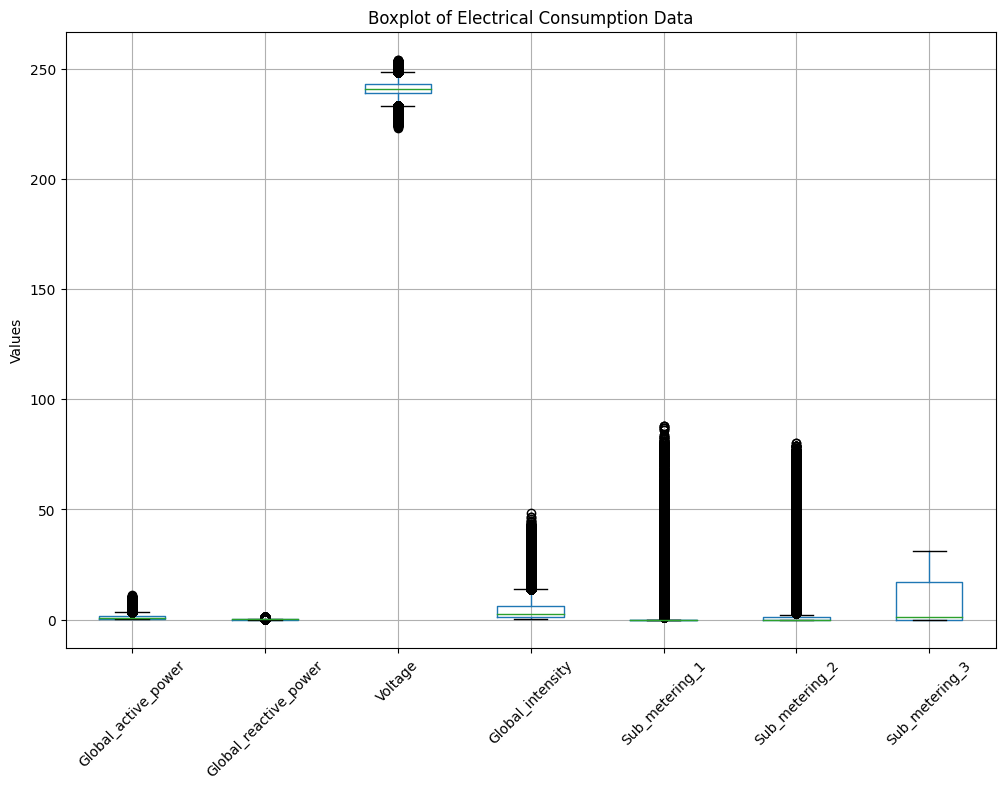

In [ ]:
#Checking for outliers
plt.figure(figsize=(12, 8))
df.boxplot(column=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.title('Boxplot of Electrical Consumption Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We have no outliers

# Data Visualiation and EDA

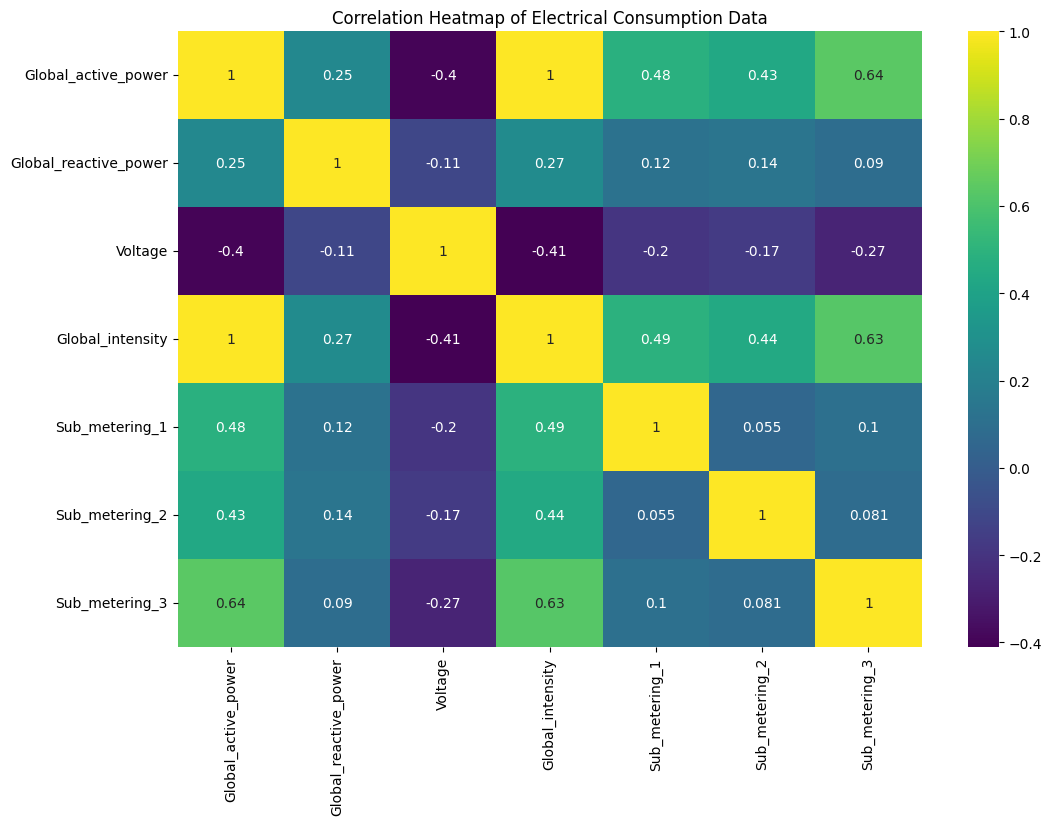

In [ ]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Electrical Consumption Data')
plt.show()

In [ ]:
#Highly correlated features summary
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]

print(f"The following {len(to_drop)} features are highly correlated (|r| > 0.5):")
print(', '.join(to_drop))

The following 2 features are highly correlated (|r| > 0.5):
Global_intensity, Sub_metering_3


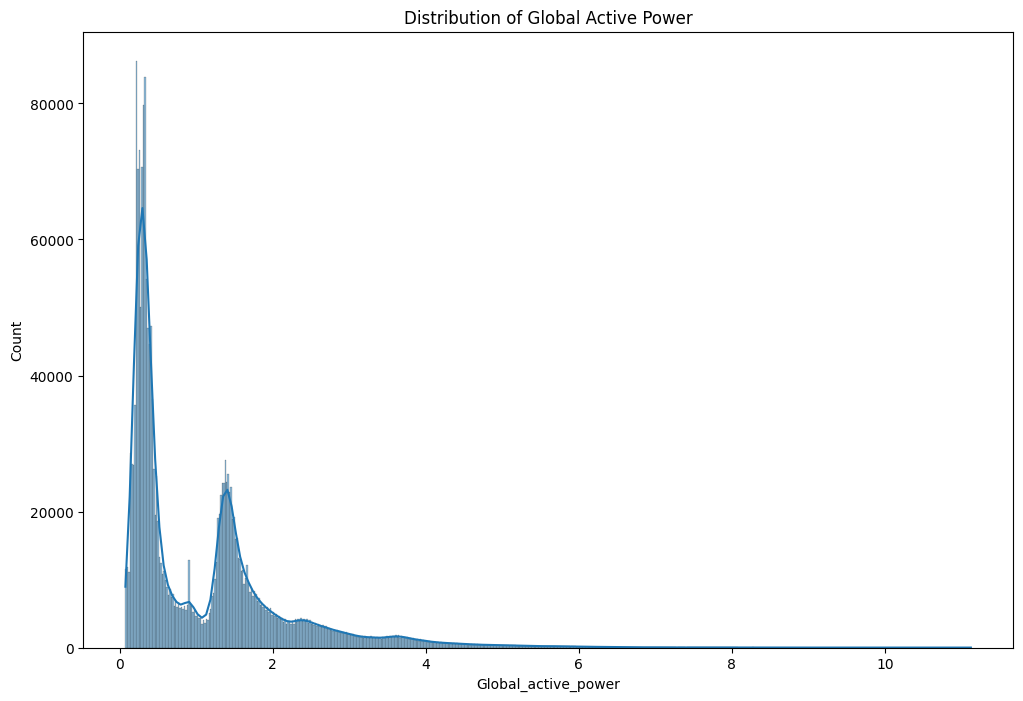

In [ ]:
#Univariate analysis on Global active power
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_active_power', kde=True)
plt.title('Distribution of Global Active Power')
plt.show()

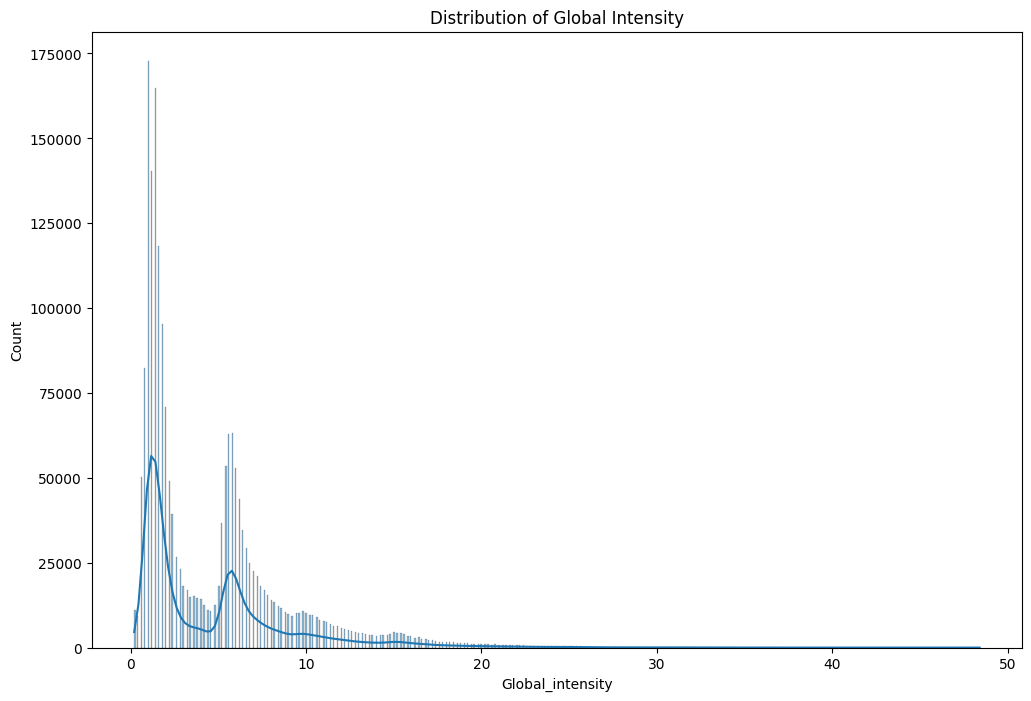

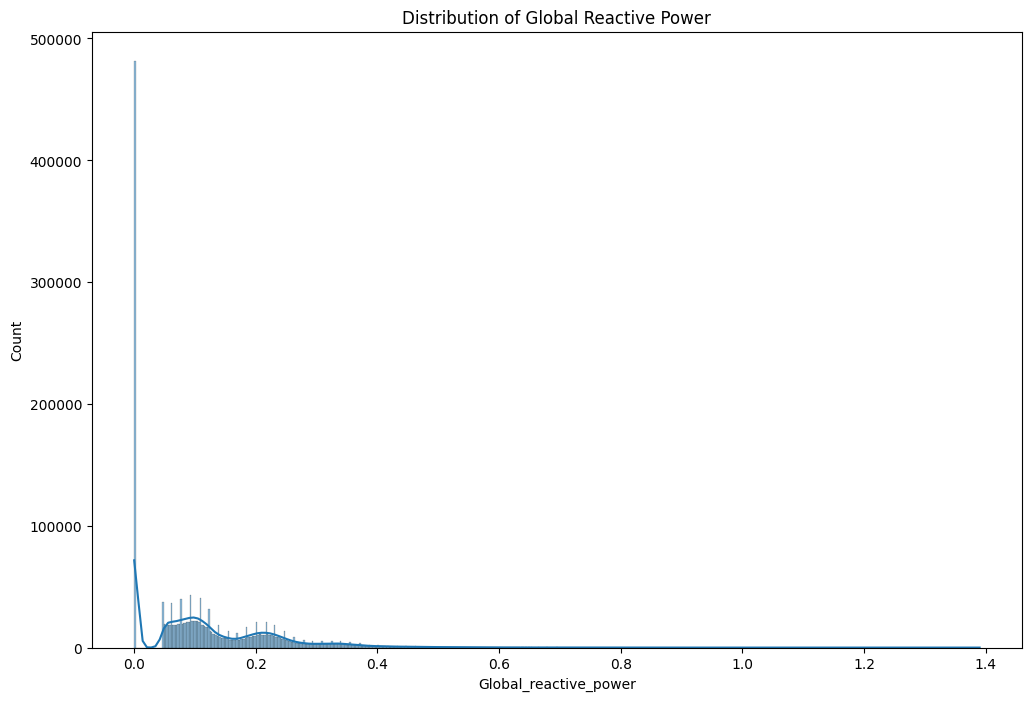

In [ ]:
##Univariate analysis on Global reactive power and Global intensity
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_intensity', kde=True)
plt.title('Distribution of Global Intensity')
plt.show()
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_reactive_power', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.show()

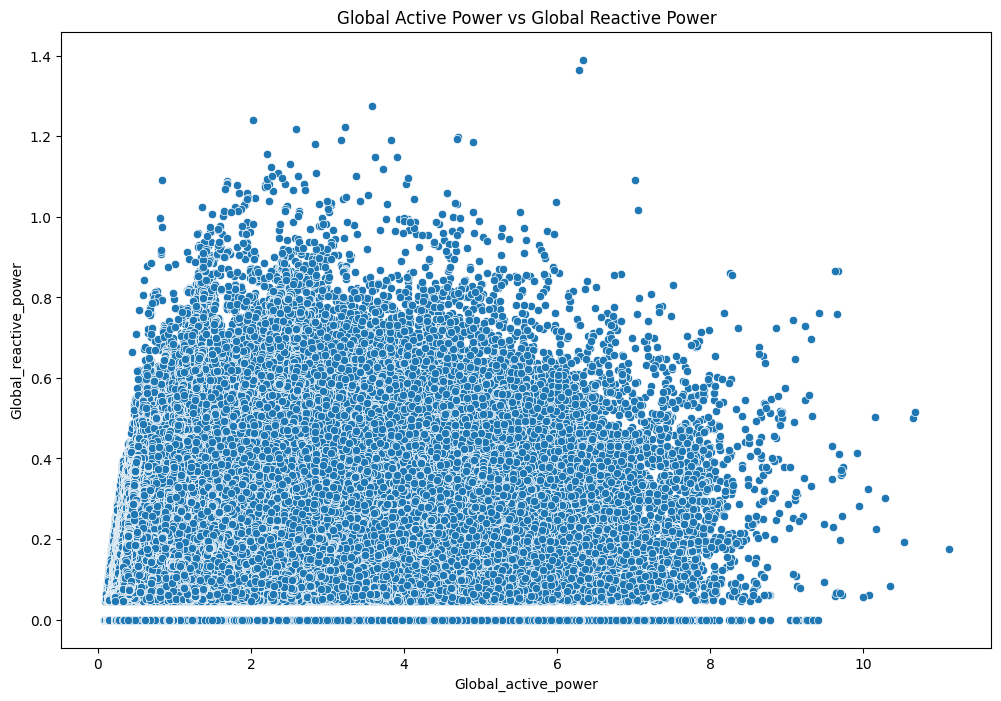

In [ ]:
#plotting global active power vs global reactive power
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_reactive_power')
plt.title('Global Active Power vs Global Reactive Power')
plt.show()

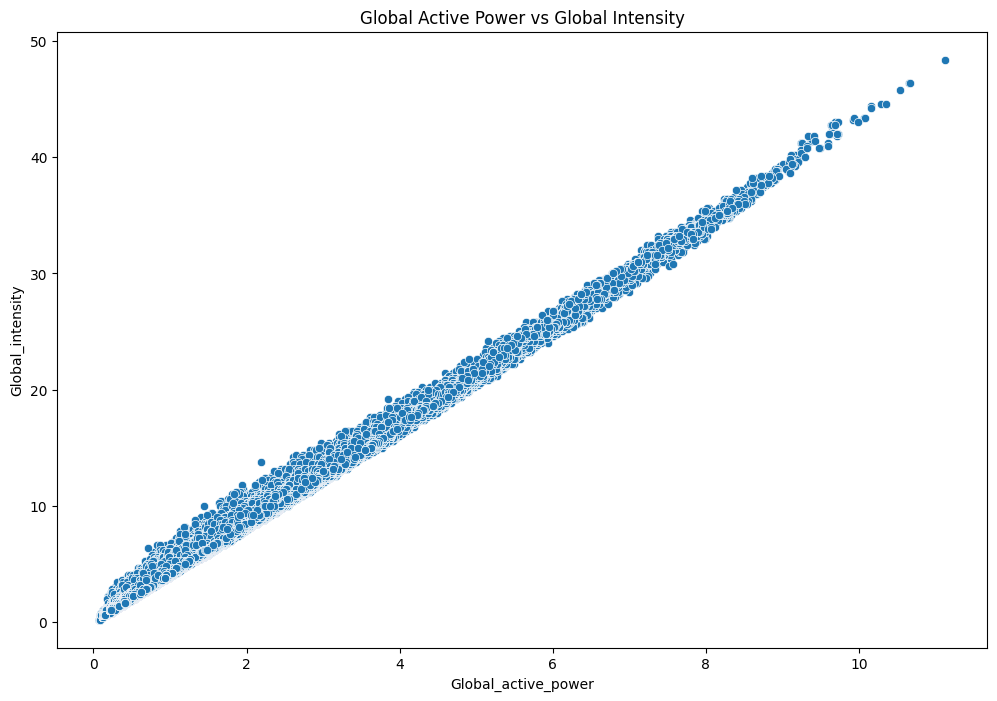

In [ ]:
#plotting global active power vs global intensity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_intensity')
plt.title('Global Active Power vs Global Intensity')
plt.show()

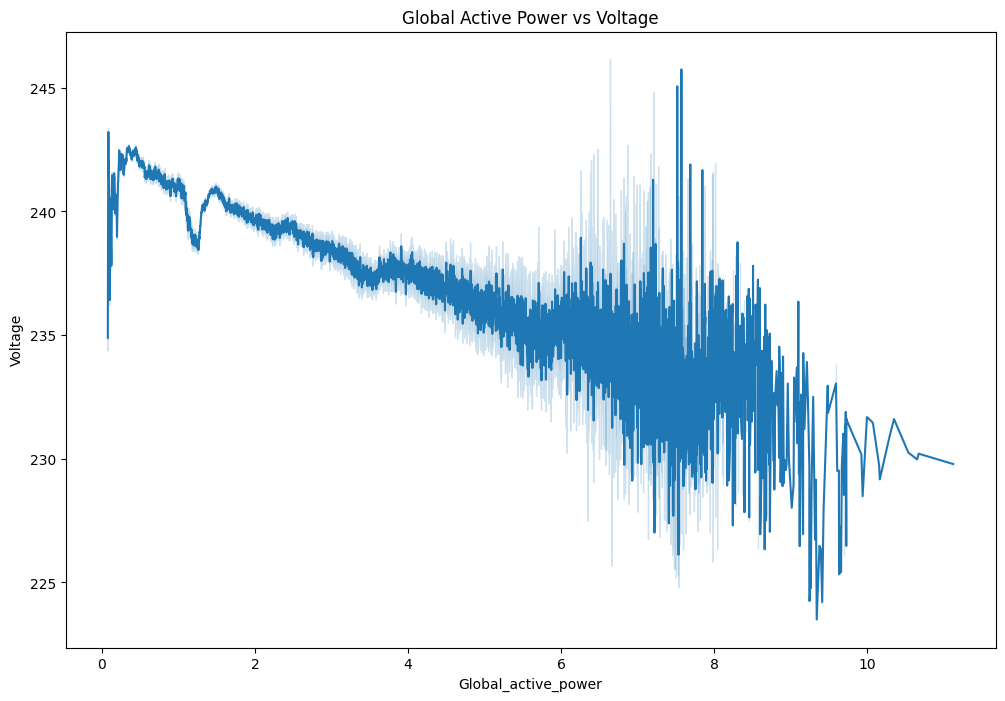

In [ ]:
#plotting global active power and voltage line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Global_active_power', y='Voltage')
plt.title('Global Active Power vs Voltage')
plt.show()

#Explain findings

In [ ]:
#Checking the distribution of out data
df.skew()

Global_active_power      1.797454
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Sub_metering_1           5.944541
Sub_metering_2           7.090553
Sub_metering_3           0.724688
dtype: float64

<ipython-input-26-a771818689ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

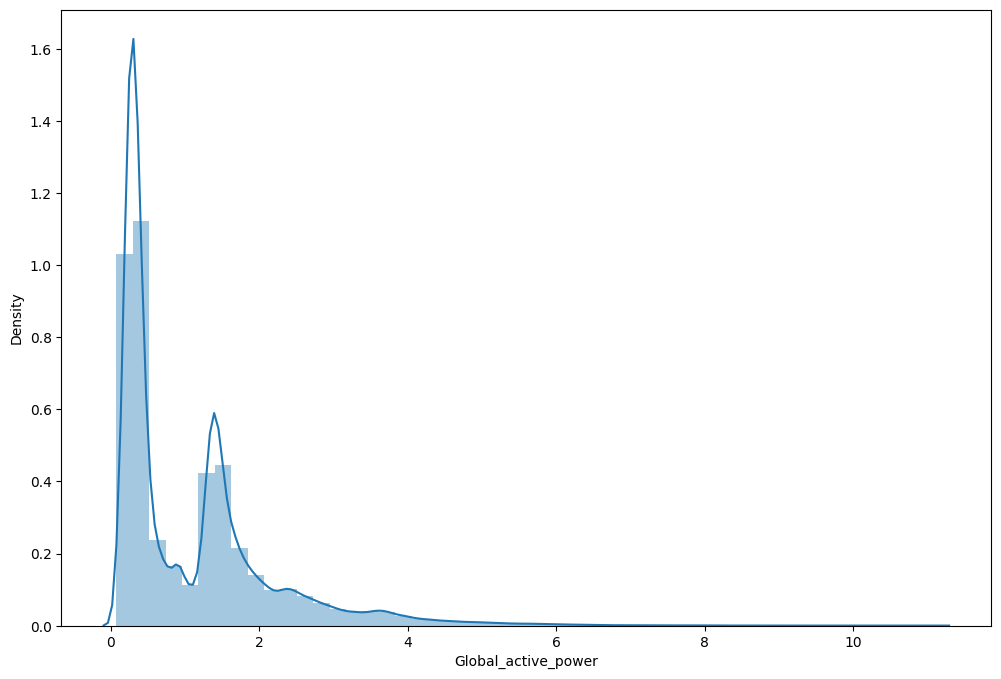

In [ ]:
#Checking if our data is normally distributed
plt.figure(figsize=(12, 8))
sns.distplot(df['Global_active_power'])

In [ ]:
def plot_all_columns(df, rule='D'):
    for c in df.select_dtypes(include=['float64']):
        df[c].resample(rule=rule).mean().plot(title=c)
        plt.show()

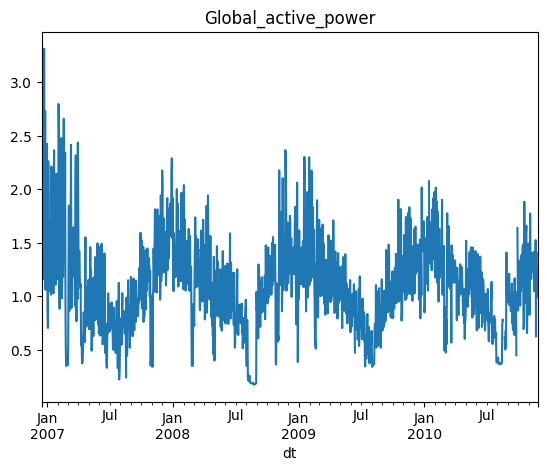

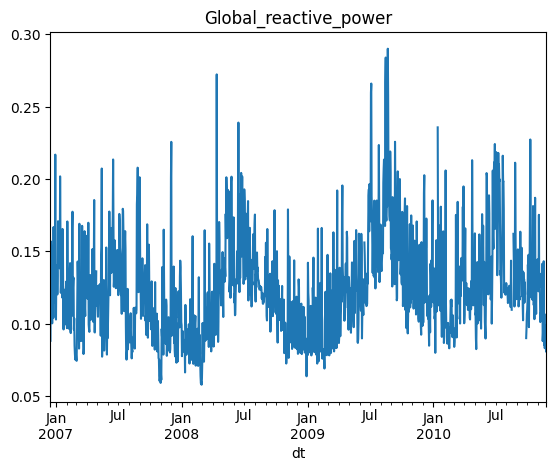

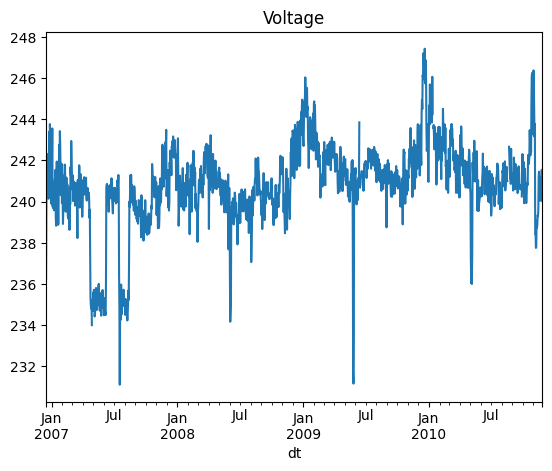

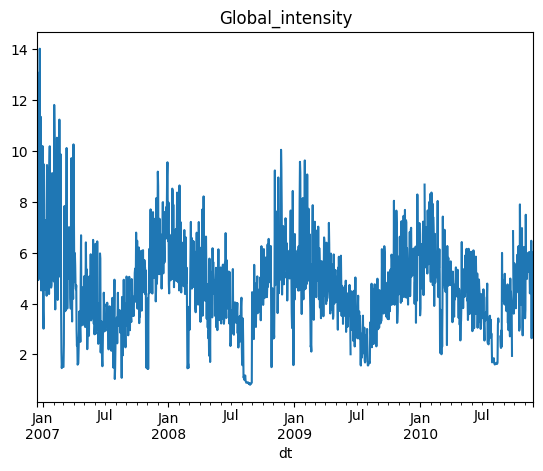

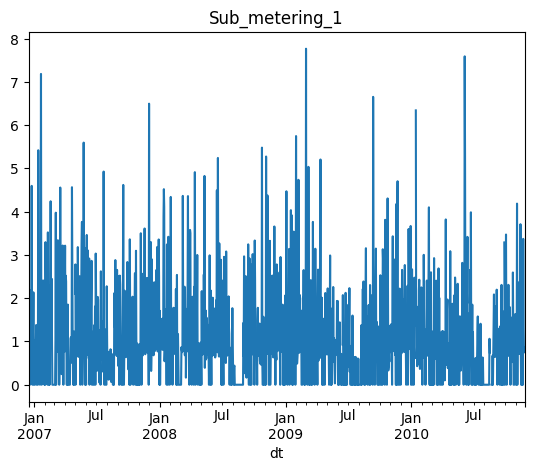

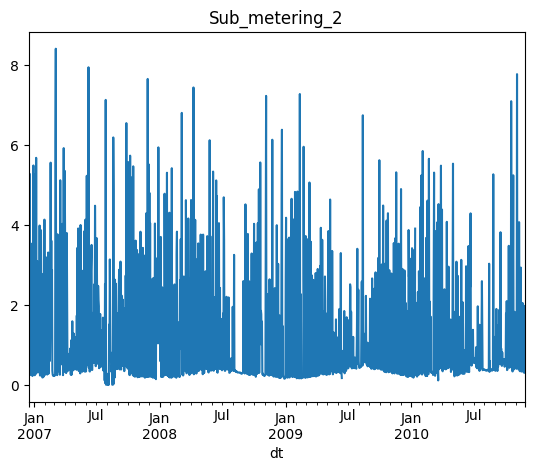

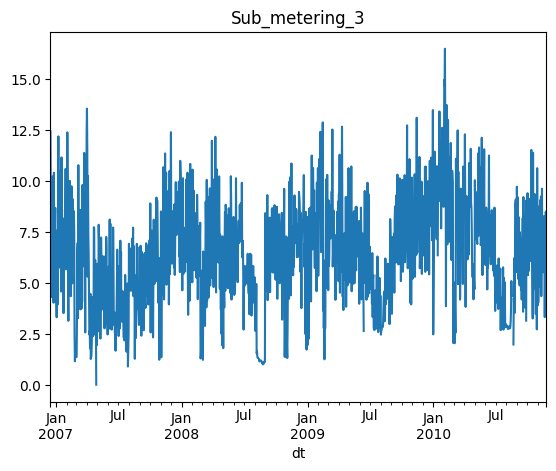

In [ ]:
plot_all_columns(df)

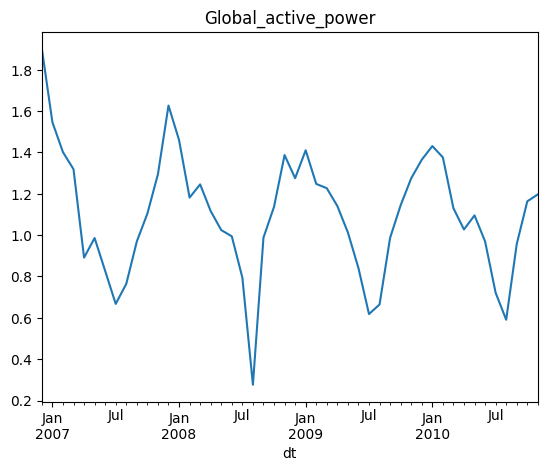

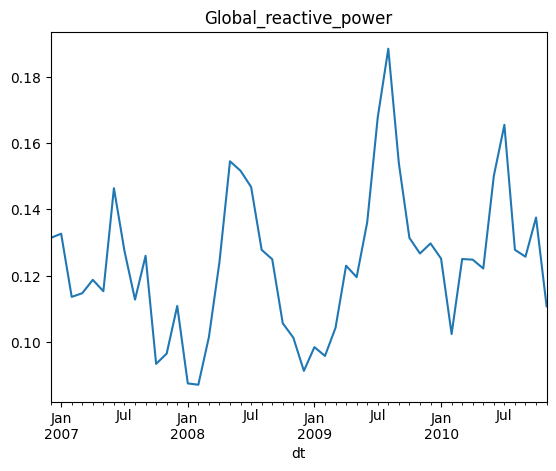

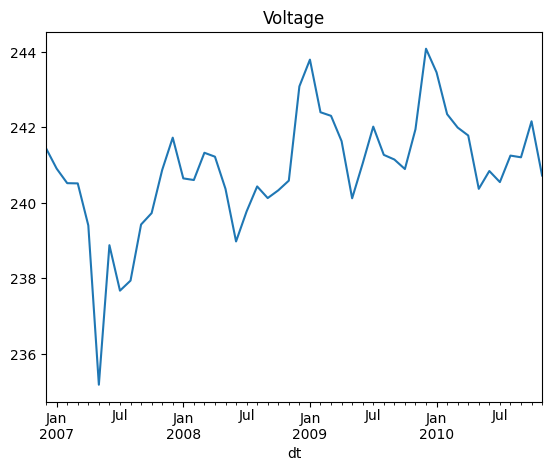

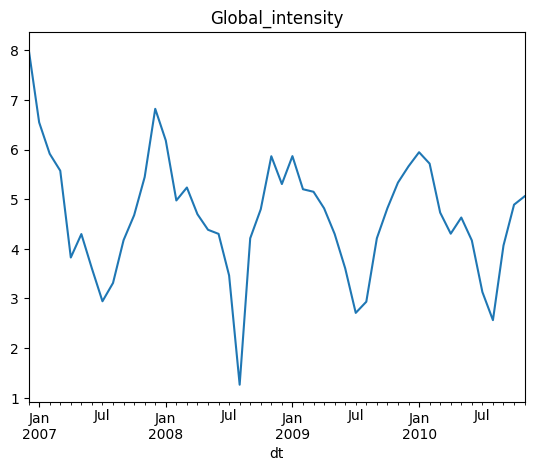

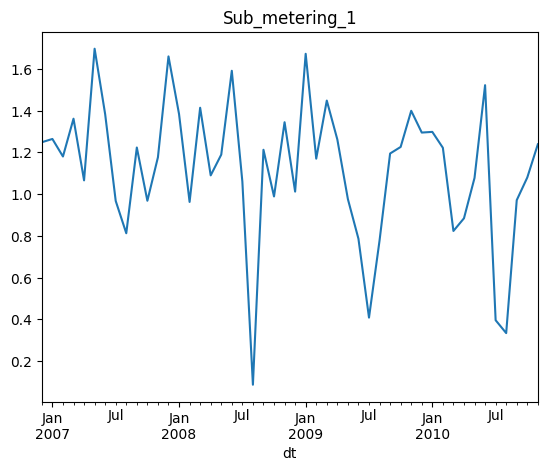

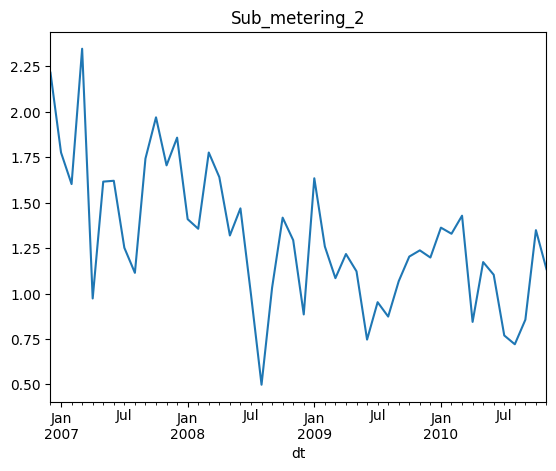

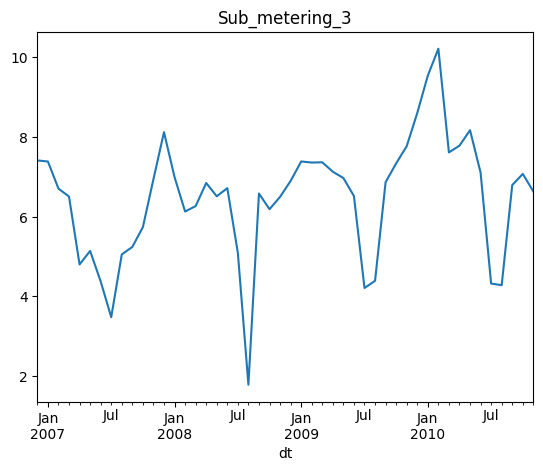

In [ ]:
plot_all_columns(df, rule='M')

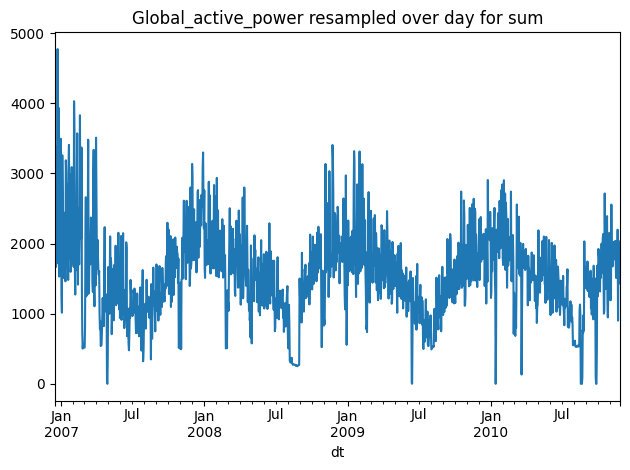

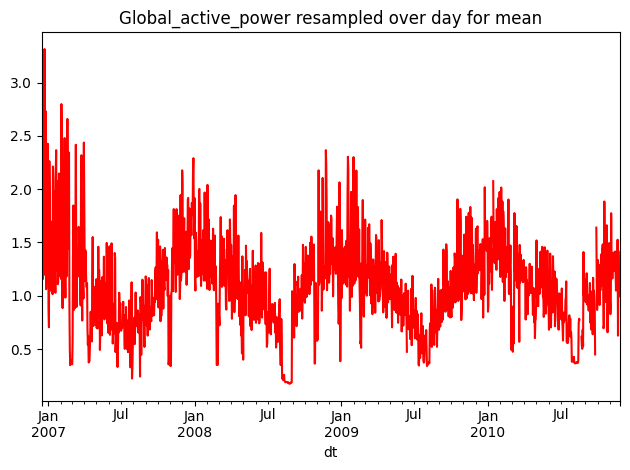

In [ ]:
#Resampling the data over Day
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red')
plt.tight_layout()
plt.show()

The sum plot helps identify total daily consumption patterns.
The mean plot helps identify average daily usage, smoothing out multiple entries per day
Sum Plot:High consumption on February 23rd and lower on 27th .
Mean plot :Highest mean on February 23rd, showing a day with consistently high usage.

Below shows the  mean and std of 'Global_intensity' resampled over day

In [ ]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

showing mean and std of 'Global_reactive_power' resampled over day

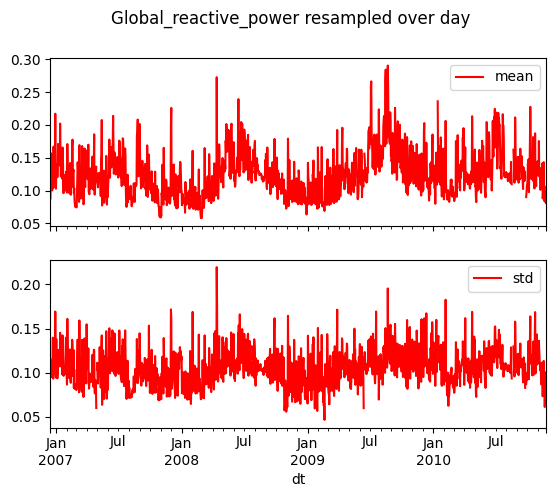

In [ ]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

Sum of 'Global_active_power' resampled over month

Columns in DataFrame: Index(['Global_active_power', 'Datetime'], dtype='object')
Monthly Sum of Global_active_power:
Datetime
2023-01-31    3.6
2023-02-28    7.3
2023-03-31    2.3
Freq: M, Name: Global_active_power, dtype: float64


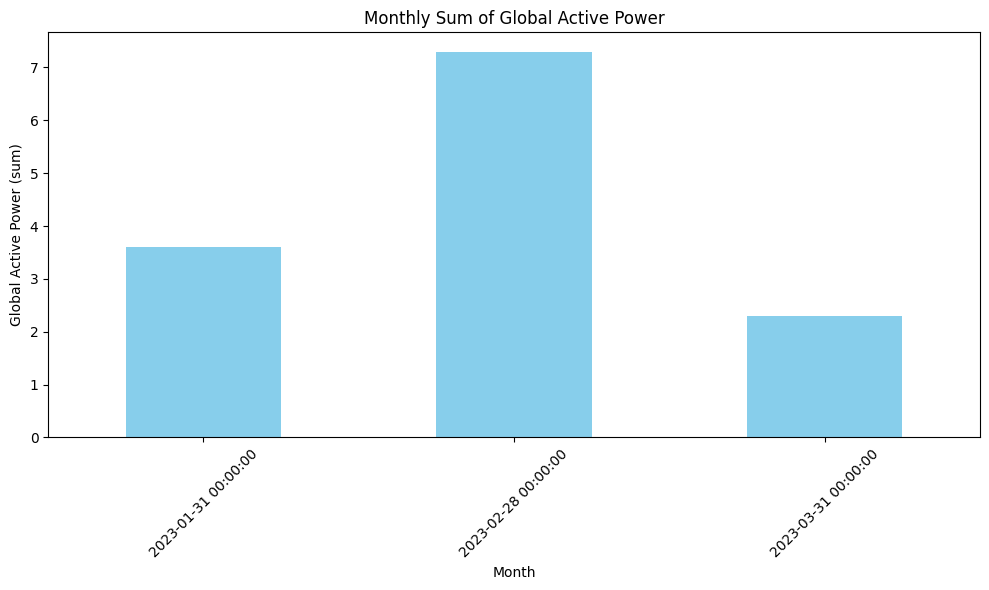

In [ ]:
# Sample data creation
data = pd.DataFrame({
    'Global_active_power': [1.2, 2.4, 3.1, 4.2, 2.3],
    'Datetime': ['2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02', '2023-03-01']
})

# Print the columns to verify
print("Columns in DataFrame:", data.columns)

# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    data.set_index('Datetime', inplace=True)

    # Resample the data by month and calculate the sum of 'Global_active_power'
    monthly_sum = data['Global_active_power'].resample('M').sum()

    # Display the result
    print("Monthly Sum of Global_active_power:")
    print(monthly_sum)
     # Plot the result
    plt.figure(figsize=(10, 6))
    monthly_sum.plot(kind='bar', color='skyblue')
    plt.title('Monthly Sum of Global Active Power')
    plt.xlabel('Month')
    plt.ylabel('Global Active Power (sum)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Datetime' does not exist in the DataFrame.")

February 2023 has the highest energy consumption (sum of 'Global_active_power'), possibly indicating higher activity or usage during that month.
March 2023 has the lowest energy consumption, which could suggest less activity or fewer data points.
January 2023 falls in between, showing moderate energy consumption.

Given that the ADF statistic (-25.145043) is much lower than the critical values at all significance levels (1%, 5%, 10%), and the p-value is 0.000000, you can reject the null hypothesis with high confidence.

In [ ]:
#Dicey-Fuller test to determine stationarity
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    # Plot timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20, 5))
    sns.despine(left=True)
    plt.plot(timeseries, color='purple', label='Original')
    plt.plot(rolmean, color='yellow', label='Rolling Mean')
    plt.plot(rolstd, color='cyan', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    print('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    dfoutput = dfoutput.append(pd.Series(dftest[4], name='Critical Values'))
    print(dfoutput)

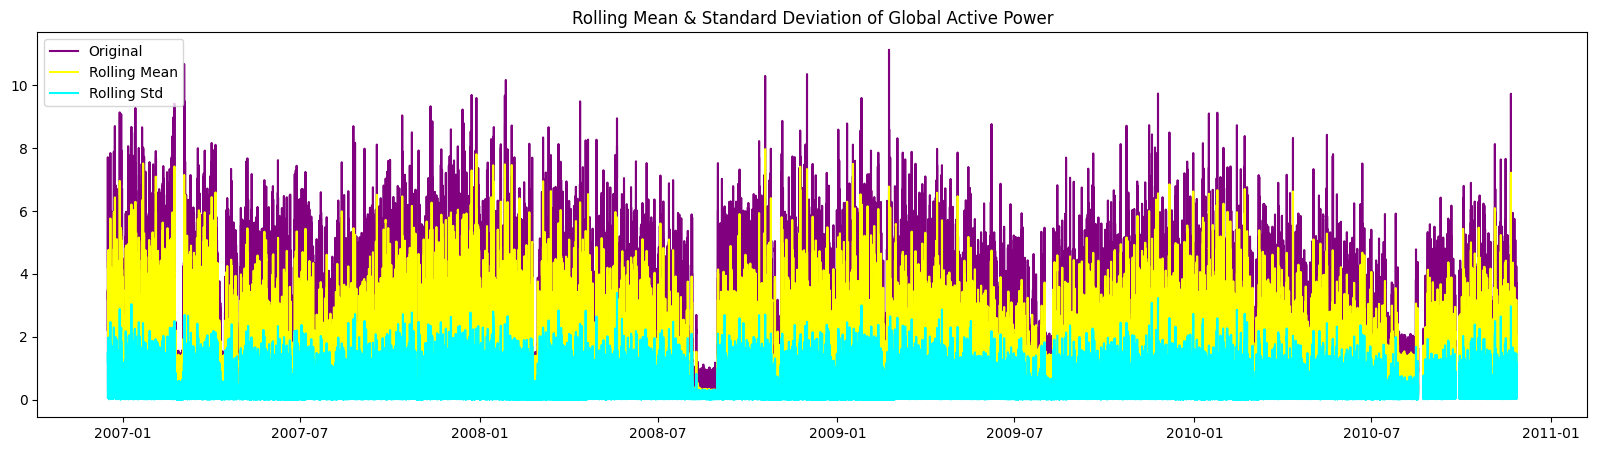

<Results of Dickey-Fuller Test>


MissingDataError: exog contains inf or nans

In [ ]:
test_stationarity(df.Global_active_power)

# Modelling and Evaluation

**MOVING AVERAGE**

In [ ]:
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)
ma = df.resample('D').mean()
ma.head()


Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

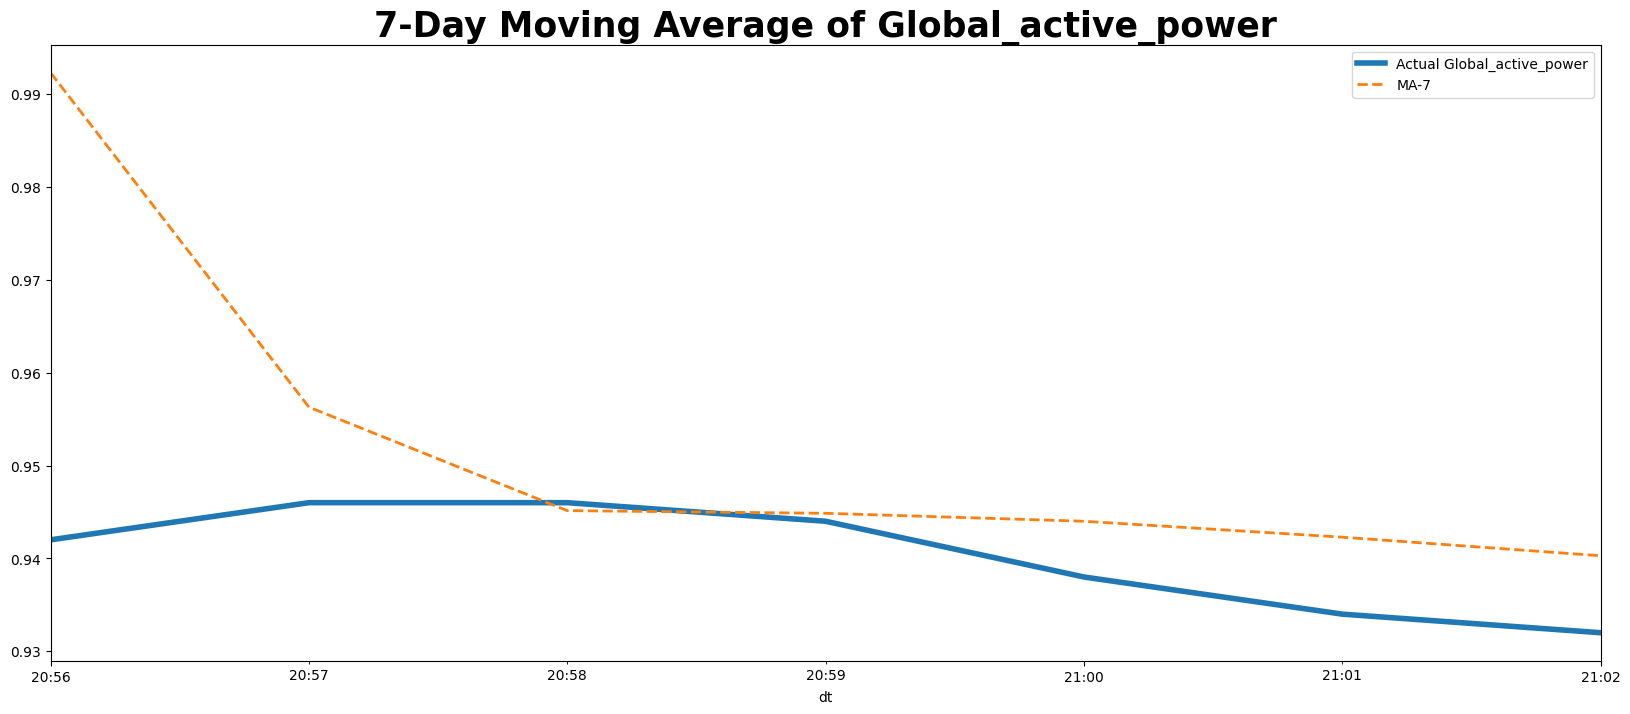

In [ ]:
import matplotlib.pyplot as plt

def moving_average(df, column_name, window):
    df['Moving Average'] = df[column_name].rolling(window).mean()
    actual = df[column_name][-window:]
    ma = df['Moving Average'][-window:]

    plt.figure(figsize=(20, 8))
    actual.plot(label='Actual {}'.format(column_name), lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Day Moving Average of {}'.format(str(window), column_name), weight='bold', fontsize=25)
    plt.legend()

# Example usage:
# Assuming df is your DataFrame with 'Global_active_power' column
moving_average(df, column_name='Global_active_power', window=7)
plt.show()  # Show the plot

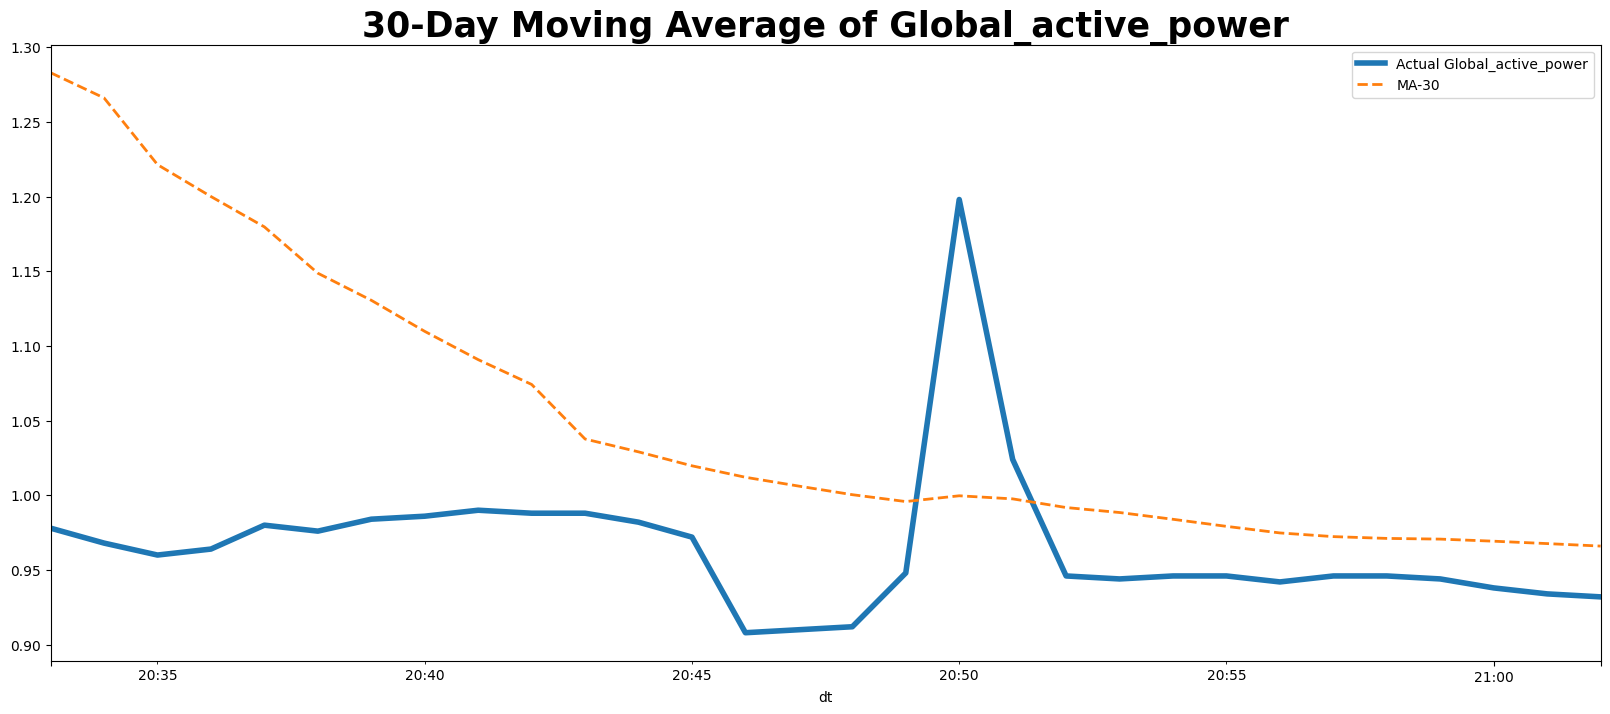

In [ ]:

def moving_average(df, column_name, window):
    df['Moving Average'] = df[column_name].rolling(window).mean()
    actual = df[column_name][-window:]
    ma = df['Moving Average'][-window:]

    plt.figure(figsize=(20, 8))
    actual.plot(label='Actual {}'.format(column_name), lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Day Moving Average of {}'.format(str(window), column_name), weight='bold', fontsize=25)
    plt.legend()

# Example usage:
# Assuming df is your DataFrame with 'Global_active_power' column
moving_average(df, column_name='Global_active_power', window=30)
plt.show()  # Show the plot

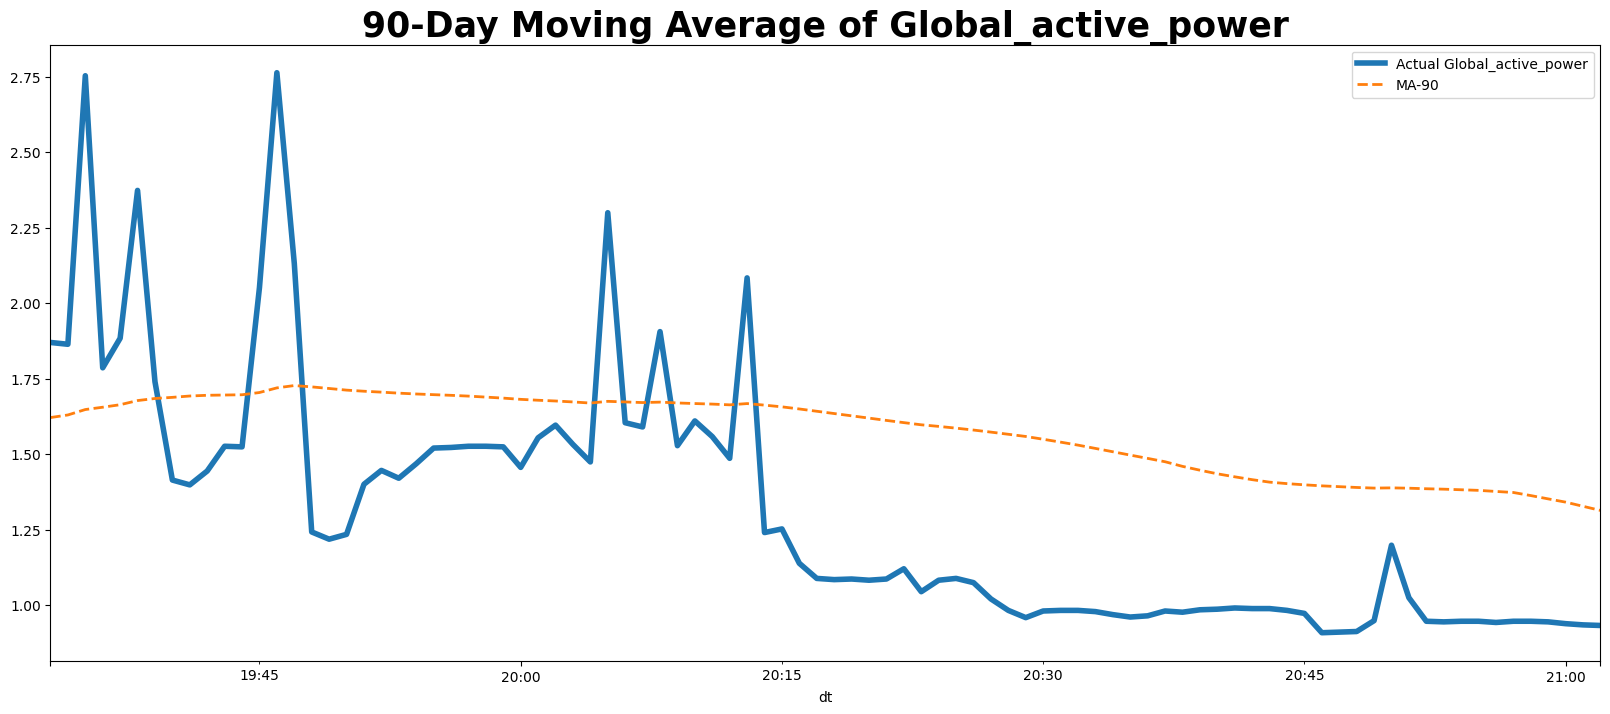

In [ ]:

def moving_average(df, column_name, window):
    df['Moving Average'] = df[column_name].rolling(window).mean()
    actual = df[column_name][-window:]
    ma = df['Moving Average'][-window:]

    plt.figure(figsize=(20, 8))
    actual.plot(label='Actual {}'.format(column_name), lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Day Moving Average of {}'.format(str(window), column_name), weight='bold', fontsize=25)
    plt.legend()

# Example usage:
# Assuming df is your DataFrame with 'Global_active_power' column
moving_average(df, column_name='Global_active_power', window=90)
plt.show()  # Show the plot

In [ ]:
from sklearn.model_selection import train_test_split

#Spliting and training the dataset
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create new DataFrames df_train and df_test from the split data
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print('Train:\t', len(df_train))
print('Test:\t', len(df_test))


Train:	 1660207
Test:	 415052


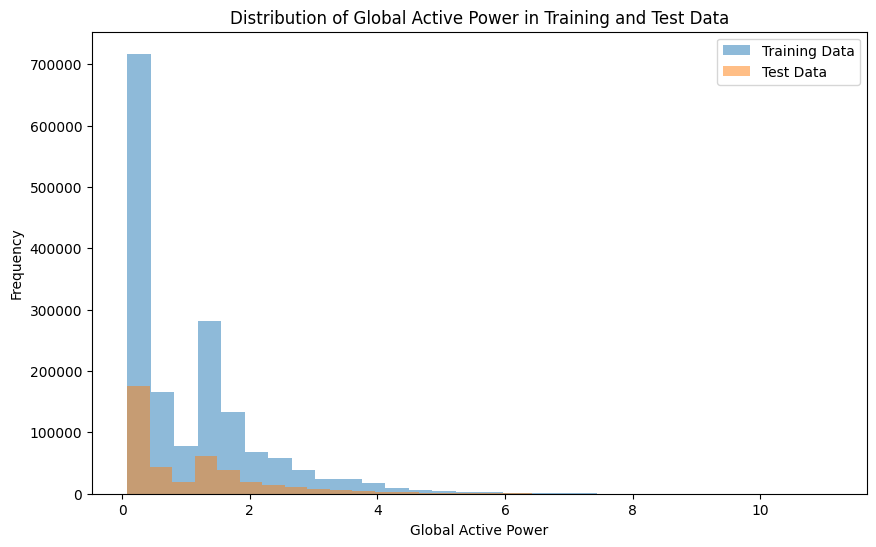

In [ ]:
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of 'Global_active_power' in training and test sets
plt.figure(figsize=(10, 6))

plt.hist(df_train['Global_active_power'], bins=30, alpha=0.5, label='Training Data')
plt.hist(df_test['Global_active_power'], bins=30, alpha=0.5, label='Test Data')

plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power in Training and Test Data')
plt.legend()

plt.show()


***Building Model with Moving Average**

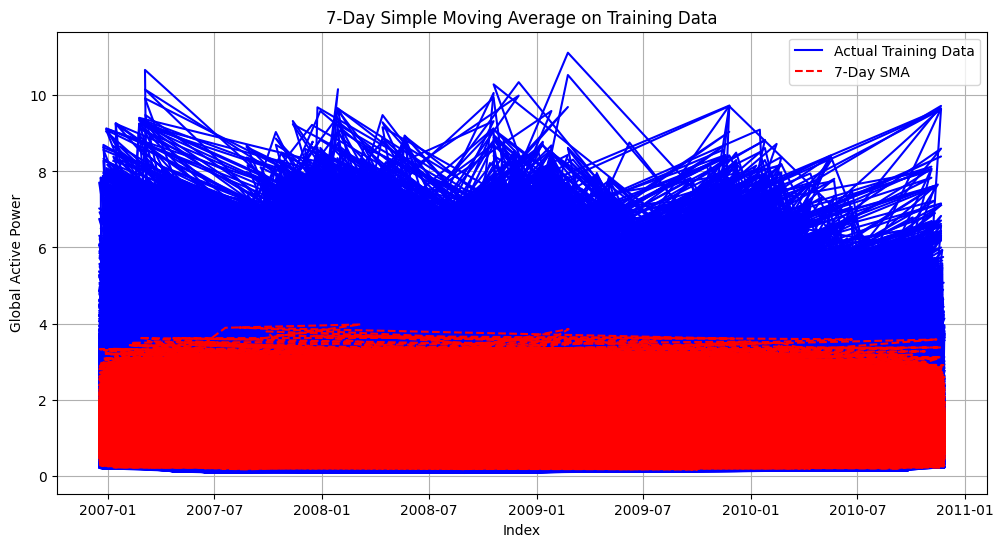

In [ ]:
#Calculate Simple Moving Average (SMA)
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculate Simple Moving Average (SMA)
window_size = 7  # Example: Using a 7-day moving average
df_train['SMA'] = df_train['Global_active_power'].rolling(window=window_size).mean()

# Step 2: Visualize the Original Data and SMA
plt.figure(figsize=(12, 6))

# Increase the chunksize to handle the complex plot
plt.rcParams['agg.path.chunksize'] = 10000

plt.plot(df_train.index, df_train['Global_active_power'], label='Actual Training Data', color='blue')
plt.plot(df_train.index, df_train['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average on Training Data')
plt.legend()
plt.grid(True)
plt.show()




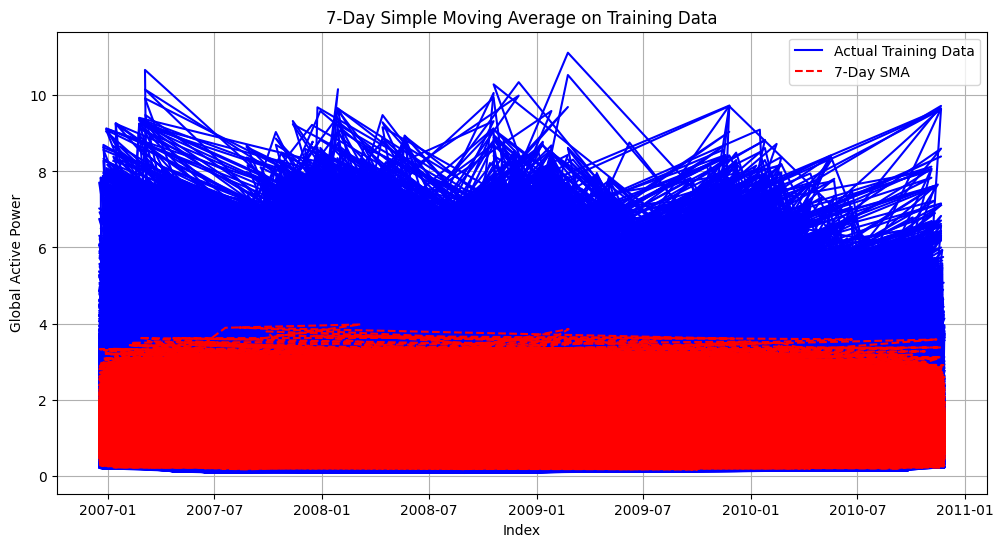

In [ ]:
#Visualization of Simple Moving Average (SMA)

import matplotlib.pyplot as plt


# Step 1: Calculate Simple Moving Average (SMA)
window_size = 7  # Example: Using a 7-day moving average
df_train['SMA'] = df_train['Global_active_power'].rolling(window=window_size).mean()

# Step 2: Visualize the Original Data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Global_active_power'], label='Actual Training Data', color='blue')
plt.plot(df_train.index, df_train['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average on Training Data')
plt.legend()
plt.grid(True)
plt.show()


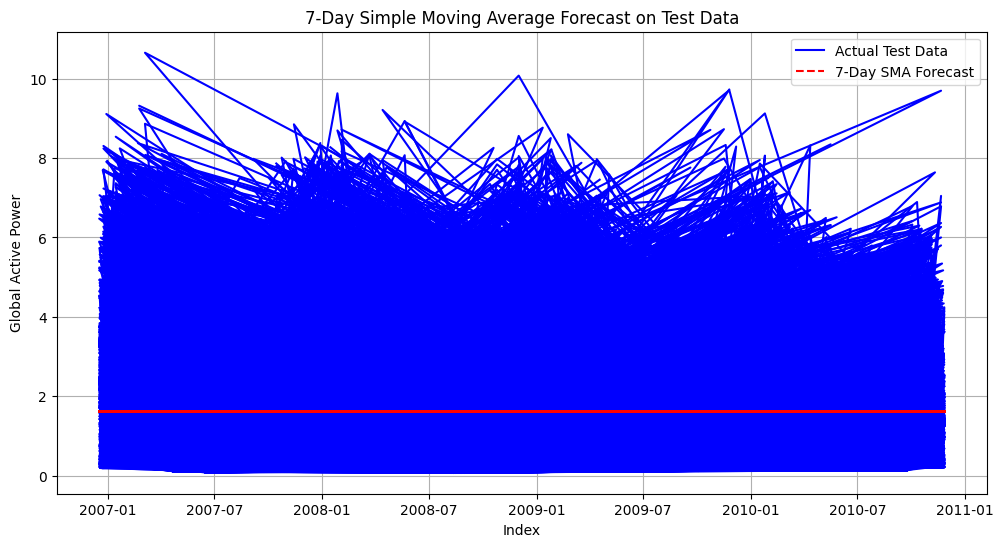

In [ ]:
#Forecasting Using SMA on Test Data

# Step 3: Forecasting using SMA on Test Data
df_test['SMA_forecast'] = df_train['SMA'].iloc[-1]  # Forecast for test data starts with the last SMA value from training data

# Optionally, visualize SMA on test data
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Global_active_power'], label='Actual Test Data', color='blue')
plt.plot(df_test.index, df_test['SMA_forecast'], label=f'{window_size}-Day SMA Forecast', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average Forecast on Test Data')
plt.legend()
plt.grid(True)
plt.show()


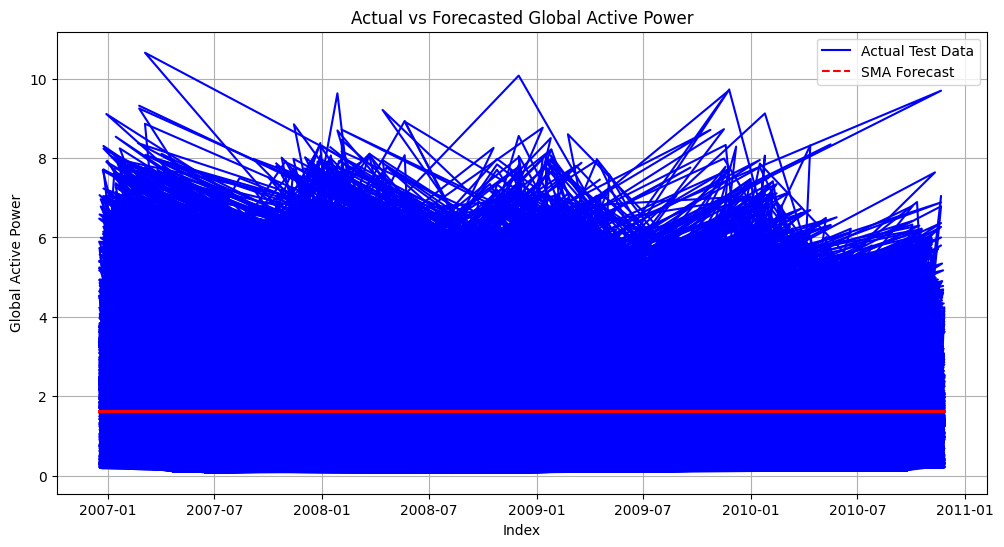

In [ ]:
#Forecasting Using SMA Model
import matplotlib.pyplot as plt

# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Global_active_power'], label='Actual Test Data', color='blue')
plt.plot(df_test.index, df_test['SMA_forecast'], label='SMA Forecast', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title('Actual vs Forecasted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define window size for SMA (e.g., 30 days)
window_size = 30

# Calculate SMA and store it in a new column 'SMA'
df['SMA'] = df['Global_active_power'].rolling(window=window_size).mean()

# Drop rows with NaN values in 'SMA' column (if any)
df.dropna(subset=['SMA'], inplace=True)

**Forecasting for 1 year**

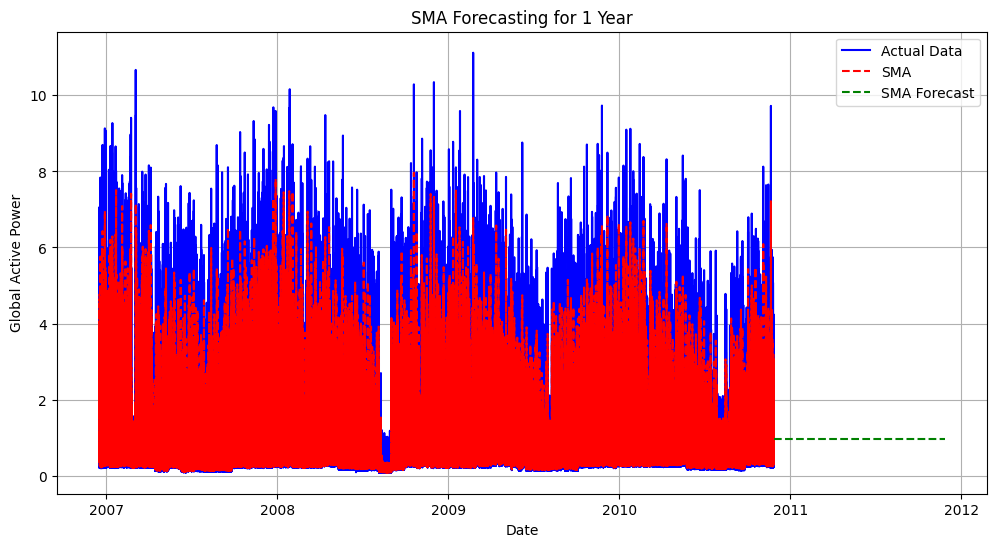

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DateOffset

# Example: Extend index to include future dates for 1 year instead of 5 years
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=365, freq='D')

# Example: Create a DataFrame for forecasting
forecast = pd.DataFrame(index=future_dates, columns=['SMA_forecast'])

# Example: Assuming 'SMA' was calculated on 'df' and not 'df_train'
if 'SMA' in df.columns:
    # Initialize SMA forecast starting with the last available SMA value
    forecast['SMA_forecast'] = df['SMA'].iloc[-1]
else:
    print("Error: 'SMA' column not found in DataFrame 'df'. Calculate SMA first.")

# Example: Plotting historical data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Actual Data', color='blue')

# Plot SMA only if it exists
if 'SMA' in df.columns:
    plt.plot(df.index, df['SMA'], label='SMA', linestyle='--', color='red')

plt.plot(forecast.index, forecast['SMA_forecast'], label='SMA Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('SMA Forecasting for 1 Year')
plt.legend()
plt.grid(True)
plt.show()

**Forecasting for 5 Years**

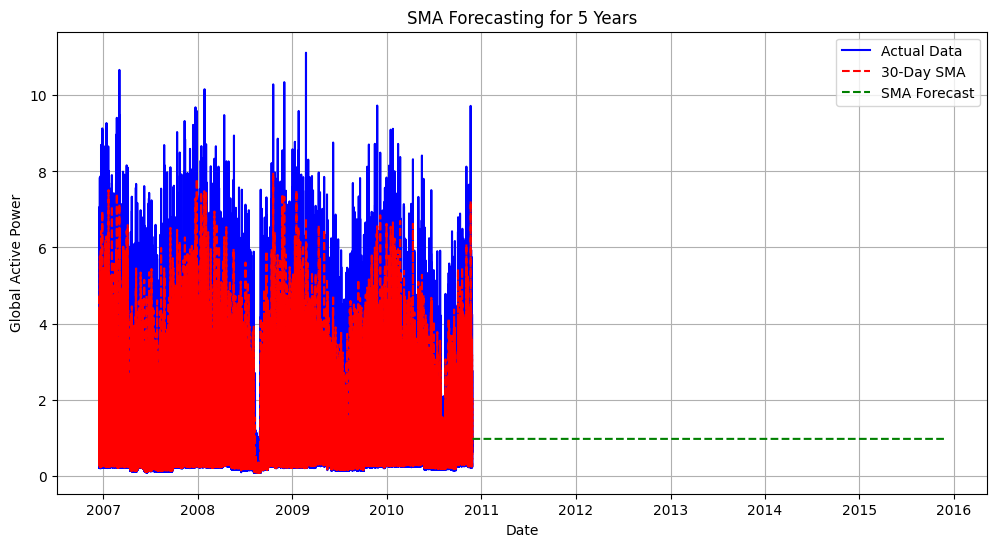

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DateOffset

# Example: Extend index to include future dates for 5 years
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=5*365, freq='D')

# Example: Create a DataFrame for forecasting
forecast = pd.DataFrame(index=future_dates, columns=['SMA_forecast'])

# Example: Assuming 'SMA' was calculated on 'df' and not 'df_train'
if 'SMA' in df.columns:
    # Initialize SMA forecast starting with the last available SMA value
    forecast['SMA_forecast'] = df['SMA'].iloc[-1]
else:
    print("Error: 'SMA' column not found in DataFrame 'df'. Calculate SMA first.")

# Example: Plotting historical data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Actual Data', color='blue')

# Plot SMA only if it exists
if 'SMA' in df.columns:
    plt.plot(df.index, df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')

plt.plot(forecast.index, forecast['SMA_forecast'], label='SMA Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title(f'SMA Forecasting for 5 Years')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Evaluation of the SMA Model

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Check for NaN values before dropping and provide feedback
if df_test['Global_active_power'].isnull().all() or df_test['SMA_forecast'].isnull().all():
    print("Error: 'Global_active_power' or 'SMA_forecast' column in 'df_test' contains all NaN values. Cannot calculate metrics.")
else:
    # Handle NaN values before calculating metrics
    df_test_cleaned = df_test.dropna(subset=['Global_active_power', 'SMA_forecast'])

    # Calculate SMA forecast errors using the cleaned DataFrame
    mae = mean_absolute_error(df_test_cleaned['Global_active_power'], df_test_cleaned['SMA_forecast'])
    rmse = np.sqrt(mean_squared_error(df_test_cleaned['Global_active_power'], df_test_cleaned['SMA_forecast']))

    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 0.99
Root Mean Squared Error (RMSE): 1.18


**Interpretation of MAE and RMSE**

**Mean Absolute Error (MAE)**:

- MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction (whether the forecast is overestimating or underestimating the actual value).MAE = 0.99 indicates that, on average, your SMA model's predictions are about 0.99 units away from the actual Global_active_power values. Root Mean Squared Error (RMSE):

- RMSE is a measure of the average magnitude of the error, where larger errors are penalized more heavily compared to MAE due to the squaring of the errors. RMSE = 1.18 indicates the square root of the average of squared differences between predicted and actual Global_active_power values.

- The SMA model achieved an MAE of 0.99 and RMSE of 1.18.These metrics indicate that our model generally predicts the Global Active Power within reasonable bounds.

**LTSM MODEL**

In [ ]:
# Transform, reshape, scale, and split the data
df = df.Global_active_power.values.astype('float32').reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
train_size = int(len(df) * 0.80)
train, test = df[:train_size], df[train_size:]
print(f'Train:\t{len(train)}')
print(f'Test:\t{len(test)}')

Train:	1637799
Test:	409450


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
# Check shapes before reshaping
print(f'X_train shape before reshaping: {X_train.shape}')
print(f'X_test shape before reshaping: {X_test.shape}')

X_train shape before reshaping: (1637769, 30)
X_test shape before reshaping: (409420, 30)


In [ ]:
# Reshape input to be [samples, time steps, features]
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
if len(X_test.shape) == 2:
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(f'X_train shape after reshaping: {X_train.shape}')
print(f'X_test shape after reshaping: {X_test.shape}')

X_train shape after reshaping: (1637769, 1, 30)
X_test shape after reshaping: (409420, 1, 30)


In [ ]:
X_train.shape
X_test.shape

(409420, 1, 30)

In [ ]:
#Long Short Term Memory model
#Importing Libraries
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
#Modelling
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model with early stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=1240, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model.summary()

Epoch 1/20
1321/1321 [==============================] - 37s 25ms/step - loss: 0.0011 - val_loss: 4.0894e-04
Epoch 2/20
1321/1321 [==============================] - 31s 24ms/step - loss: 6.6108e-04 - val_loss: 3.9392e-04
Epoch 3/20
1321/1321 [==============================] - 31s 24ms/step - loss: 6.4699e-04 - val_loss: 3.9079e-04
Epoch 4/20
1321/1321 [==============================] - 32s 24ms/step - loss: 6.3727e-04 - val_loss: 3.8876e-04
Epoch 5/20
1321/1321 [==============================] - 33s 25ms/step - loss: 6.2892e-04 - val_loss: 3.8901e-04
Epoch 6/20
1321/1321 [==============================] - 31s 24ms/step - loss: 6.2819e-04 - val_loss: 3.8809e-04
Epoch 7/20
1321/1321 [==============================] - 32s 24ms/step - loss: 6.2410e-04 - val_loss: 3.8831e-04
Epoch 8/20
1321/1321 [==============================] - 32s 24ms/step - loss: 6.2415e-04 - val_loss: 3.8788e-04
Epoch 9/20
1321/1321 [==============================] - 32s 24ms/step - loss: 6.2288e-04 - val_loss: 3.8796e

In [ ]:
#Model Evaluation
# Make predictions and invert them
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
Y_train = scaler.inverse_transform([Y_train])[0]
Y_test = scaler.inverse_transform([Y_test])[0]

# Calculate and print errors
print('Train MAE:', mean_absolute_error(Y_train, train_predict[:, 0]))
print('Train RMSE:', np.sqrt(mean_squared_error(Y_train, train_predict[:, 0])))
print('Test MAE:', mean_absolute_error(Y_test, test_predict[:, 0]))
print('Test RMSE:', np.sqrt(mean_squared_error(Y_test, test_predict[:, 0])))

12795/12795 [==============================] - 30s 2ms/step
Train MAE: 0.09685471563381381
Train RMSE: 0.26712243853492507
Test MAE: 0.08154983299003572
Test RMSE: 0.21754699641461045


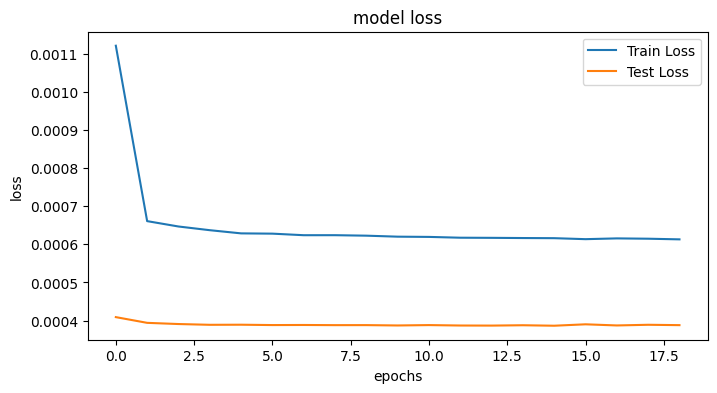

In [ ]:
#AUC -ROC Curve
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

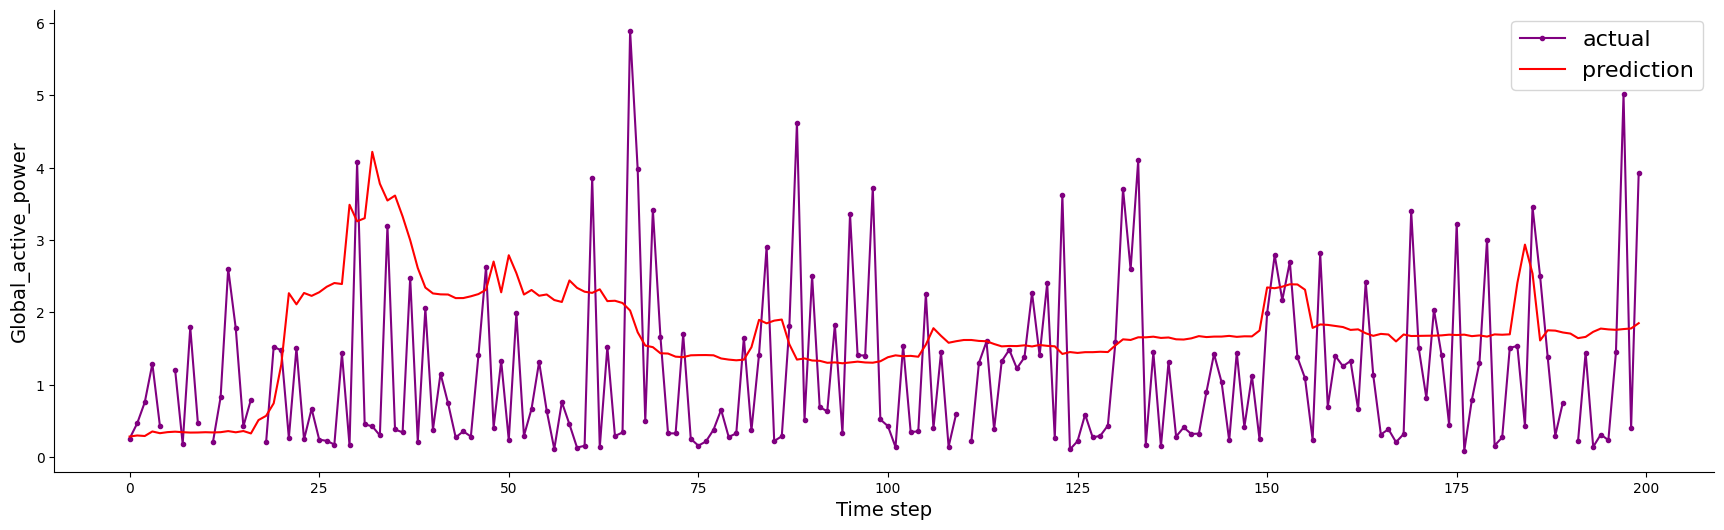

In [ ]:
# Prepare data for plotting
aa = range(200)

# Create and configure plot
plt.figure(figsize=(20, 6))
# Use .iloc to index into the Pandas Series
plt.plot(aa, y_test.iloc[:200], marker='.', label="actual", color='purple')
plt.plot(aa, test_predict[:, 0][:200], '-', label="prediction", color='red')
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=14)
plt.xlabel('Time step', size=14)
plt.legend(fontsize=16)
plt.show()


**SARIMAX MODEL**

In [ ]:
# Resample data to daily frequency
df_daily = df.resample('D').sum()


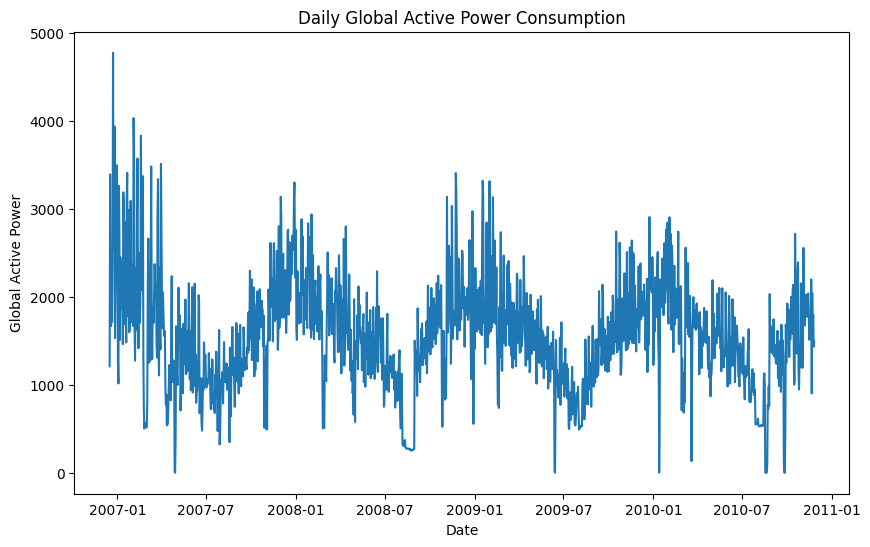

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_daily['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Daily Global Active Power Consumption')
plt.show()

In Jan 2007 shows a higher spike which explains that there is a higher energy demand, which could be useful for managing energy usage and costs.Over the years, shows a  decrease in consumption patterns which  might indicate improved energy efficiency, possibly from using energy-saving appliances or adopting conservation measures.



In [ ]:
import statsmodels.api as sm  # Import statsmodels.api for statistical tools
def print_and_plot_acf(df_daily):
    print(sm.tsa.stattools.acf(df_daily, nlags=16))
    sm.graphics.tsa.plot_acf(df_daily, lags=16)
    plt.show()

def print_and_plot_pacf(df_daily):
    print(sm.tsa.stattools.acf(df_daily, nlags=16))
    sm.graphics.tsa.plot_pacf(df_daily, lags=16)
    plt.show()

[ 1.          0.64642459  0.29004362 -0.03936469 -0.31663492 -0.4845685
 -0.55611073 -0.55513039 -0.3952691  -0.07439165  0.25199873  0.48778023
  0.62333202  0.50124972  0.24087083  0.02845123 -0.15293008]


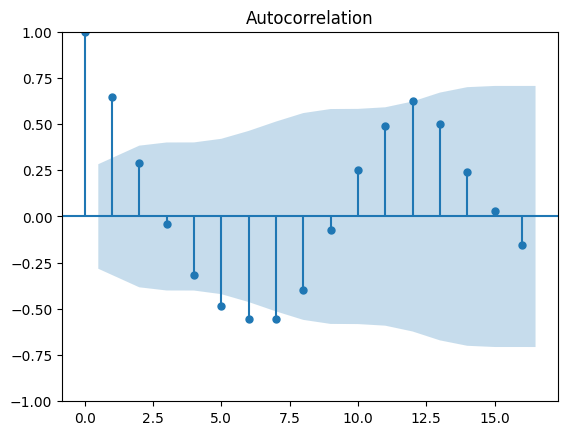

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

monthly_df = df_daily.resample(rule='M').mean()
print_and_plot_acf(monthly_df['Global_active_power'])


- The high autocorrelation at lag 1 indicates that household energy consumption is likely influenced by daily routines. If one day’s consumption is high, it is likely that the following day’s consumption will also be high.
- The positive correlations at specific lags could indicate weekly usage patterns, where certain days of the week see similar levels of consumption. Negative correlations might suggest days when household activities differ significantly (e.g., weekends vs. weekdays).
- The reappearance of positive correlations around lag 12 suggests potential monthly or bi-monthly cycles in energy usage. This could be due to billing cycles, specific monthly activities, or seasonal effects.
- The negative correlations at some lags might indicate the impact of energy-saving measures or behaviors that are implemented periodically (e.g., energy-saving weekends or specific off-peak usage strategies).Generally identifying periods of high usage can help in managing peak loads and potentially shifting some energy-intensive activities to off-peak times.



[ 1.          0.64642459  0.29004362 -0.03936469 -0.31663492 -0.4845685
 -0.55611073 -0.55513039 -0.3952691  -0.07439165  0.25199873  0.48778023
  0.62333202  0.50124972  0.24087083  0.02845123 -0.15293008]


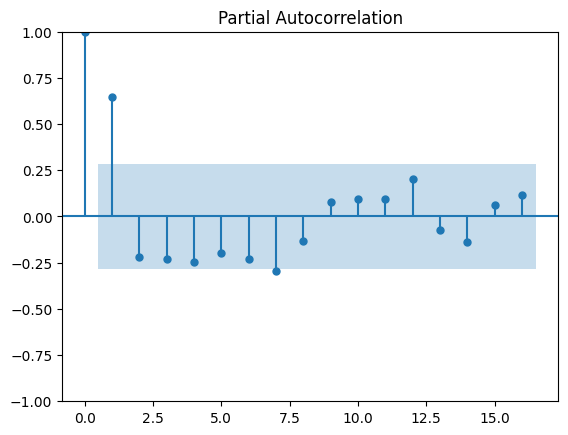

In [ ]:
monthly_df = df_daily.resample(rule='M').mean()
print_and_plot_pacf(monthly_df['Global_active_power'])

- The strong PACF at lag 1 reinforces the idea that household energy consumption is influenced by daily routines. High energy usage one day is likely to directly influence high usage the next day.
- Negative PACF values at certain lags could suggest weekly patterns where days within the week affect each other negatively. For instance, high usage on weekends might result in lower usage on weekdays.
- Households can plan better for energy usage, adopting measures to smooth out peaks and reduce consumption during high-demand periods.

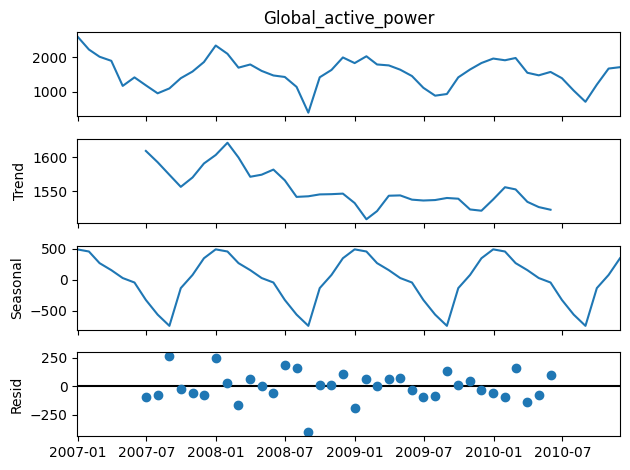

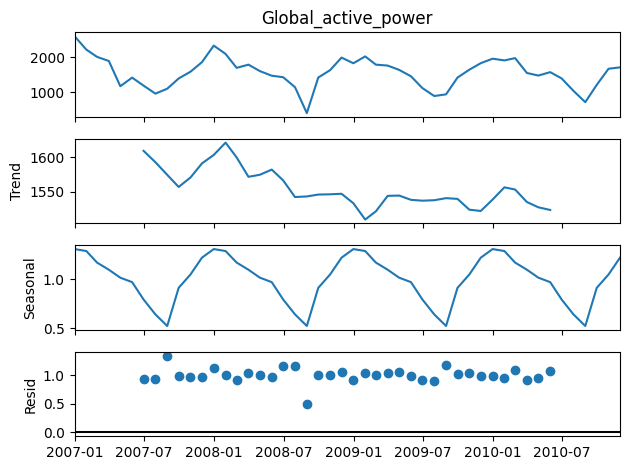

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_model = seasonal_decompose(monthly_df['Global_active_power'], model='additive',
                                    period=12)

additive_model.plot()
plt.show()


multiplicative_model = seasonal_decompose(monthly_df['Global_active_power'], model='multiplicative',
                                    period=12)

multiplicative_model.plot()
plt.show()

-1) Trend
*Additive*
  The trend is increasing in July it means household energy consumption is generally rising during that period since its known to be a cold season. Then a decreasing trend in January indicating decrease in energy Levels.
*Multiplicative*
  shows the percentage change in the trend.Theres a growth in July and decline in January.
- 2)Seasonal Component:
*Additive*
   Higher energy usage during winter months(July) due to heating or during summer months due to cooling.
*Multiplicative*
   Shows the relative seasonal effect in terms of a multiplicative factor
- 3)Residual Component:
*Additive*
There is a high variability in July in the residual component indicating that there are other unexplained factors affecting energy consumption.
*Multiplicative*
 It helps identify periods of unusually high or low energy usage that are not explained by trend and seasonality.

- The residual component can be used to detect anomalies or irregular spikes in energy consumption. This could indicate issues such as faulty appliances, unusual activities, or other external factors affecting energy usage.



[ 1.          0.06349135 -0.08375727 -0.05439698 -0.13628119 -0.01685227
  0.08365774 -0.006746   -0.09535498  0.01820025  0.22216108  0.05776533
 -0.10100642  0.03341776 -0.08182301  0.14055372  0.18483565]


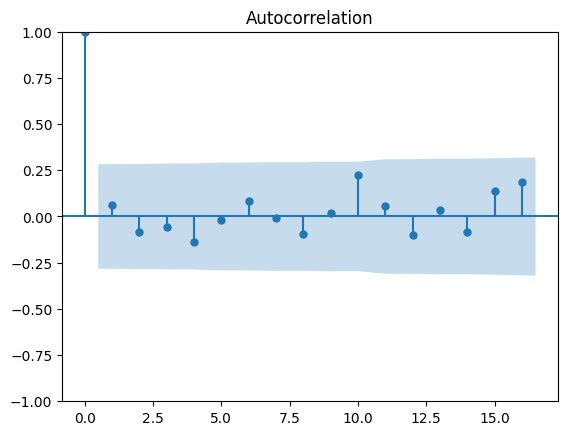

In [ ]:
des = monthly_df['Global_active_power'] - additive_model.seasonal
print_and_plot_acf(des)

In [ ]:
additive_model.trend

dt
2006-12-31            NaN
2007-01-31            NaN
2007-02-28            NaN
2007-03-31            NaN
2007-04-30            NaN
2007-05-31            NaN
2007-06-30    1609.104704
2007-07-31    1592.637576
2007-08-31    1574.290087
2007-09-30    1556.709912
2007-10-31    1570.407778
2007-11-30    1590.805356
2007-12-31    1603.192682
2008-01-31    1621.037803
2008-02-29    1599.557975
2008-03-31    1571.422373
2008-04-30    1574.435521
2008-05-31    1581.886072
2008-06-30    1566.231317
2008-07-31    1542.051704
2008-08-31    1542.925950
2008-09-30    1545.665473
2008-10-31    1546.027626
2008-11-30    1546.819319
2008-12-31    1533.072785
2009-01-31    1509.413691
2009-02-28    1521.305559
2009-03-31    1543.743716
2009-04-30    1544.216464
2009-05-31    1538.019920
2009-06-30    1536.768045
2009-07-31    1537.441088
2009-08-31    1540.454159
2009-09-30    1539.390970
2009-10-31    1523.713907
2009-11-30    1521.861653
2009-12-31    1538.399461
2010-01-31    1556.166755
2010-02-2

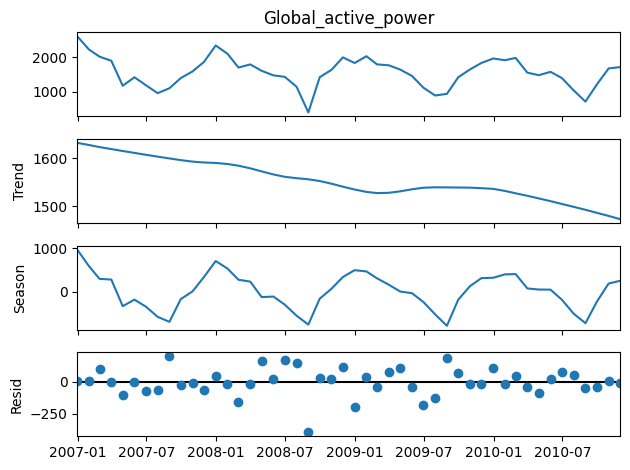

In [ ]:
from statsmodels.tsa.seasonal import STL

stl_result = STL(monthly_df['Global_active_power']).fit()
stl_result.plot()
plt.show()

- Observed: The raw data of household energy consumption over time.
- Trend: A smooth curve showing the long-term trend.
- Seasonal: A repeating pattern that highlights periodic variations.
- Residual: Random fluctuations after removing the trend and seasonal components.

[1.         0.91626883 0.83342435 0.75244521 0.67438421 0.6000977
 0.53014962 0.46485307 0.40444075 0.34916663 0.29931133 0.25505712
 0.21512638 0.17600884 0.1382121  0.10194399 0.06843635]


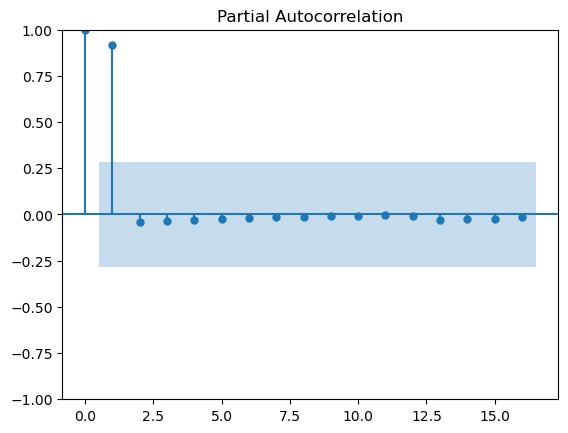

In [ ]:
print_and_plot_pacf(stl_result.trend)
# AR(1)

- The high PACF values at the first few lags indicate that the household energy consumption trend is predictable over short to medium terms. This predictability can be leveraged for more accurate forecasting and planning.
- Given the persistence in the trend, households can expect similar consumption patterns over successive periods. This can help in better managing energy resources, scheduling energy-intensive activities, and potentially benefiting from time-of-use pricing by shifting usage to off-peak periods.


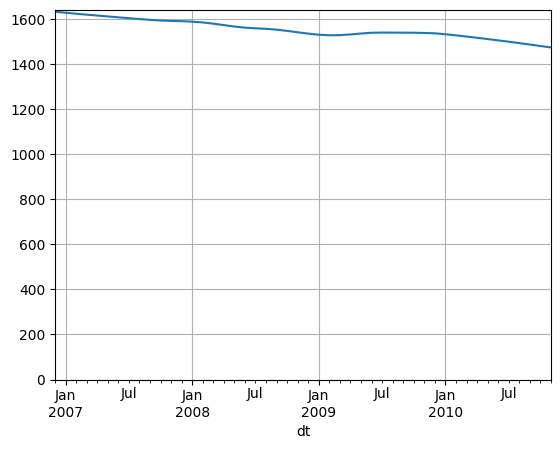

In [ ]:
stl_result.trend.dropna().plot(grid=True)
plt.ylim(ymin=0)
plt.show()
# d = 0

- The plotted trend line reveals that energy  the energy consumption is increasing, decreasing, or stable over time.
- Households can gain insights into their long-term energy usage patterns and make informed decisions to optimize energy consumption, reduce costs, and contribute to energy sustainability efforts.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

data = stl_result.trend

auto_arima_model = auto_arima(data, seasonal=False)

print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 -52.865
Date:                Tue, 02 Jul 2024   AIC                            115.729
Time:                        16:14:33   BIC                            124.980
Sample:                    12-31-2006   HQIC                           119.210
                         - 11-30-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3886      0.178     -2.183      0.029      -0.737      -0.040
ar.L1          1.8178      0.122     14.957      0.000       1.580       2.056
ar.L2         -1.2590      0.223     -5.642      0.0

- The AR terms suggest that household energy consumption is heavily influenced by its own past values. The strong AR(1) term (1.8178) indicates a substantial positive autocorrelation, meaning if consumption was high in the previous month, it is likely to be high in the current month.
- The negative AR(2) term (-1.2590) and the positive AR(3) term (0.3340) indicate more complex dynamics, potentially reflecting periodic adjustments in consumption patterns.
-The model appears to fit the data well, with significant AR terms and a reasonable log likelihood.
- The high p-value in the Ljung-Box test suggests no remaining autocorrelation in residuals, indicating a good model fit.
- However, the Jarque-Bera test suggests some deviation from normality in residuals, which could affect the reliability of statistical inferences.
- The heteroskedasticity test indicates potential non-constant variance in residuals, suggesting variability in consumption patterns that may need further investigation.
- By leveraging these model insights, households can optimize their energy consumption, reduce costs, and contribute to sustainability efforts.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                   48
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -81.463
Date:                Tue, 02 Jul 2024   AIC                            170.925
Time:                        16:14:42   BIC                            178.410
Sample:                    12-31-2006   HQIC                           173.754
                         - 11-30-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1541.3222     83.278     18.508      0.000    1378.099    1704.545
ar.L1          1.9641      0.071     27.550      0.000       1.824       2.104
ar.L2         -0.9661      0.068    -14.293      0.0

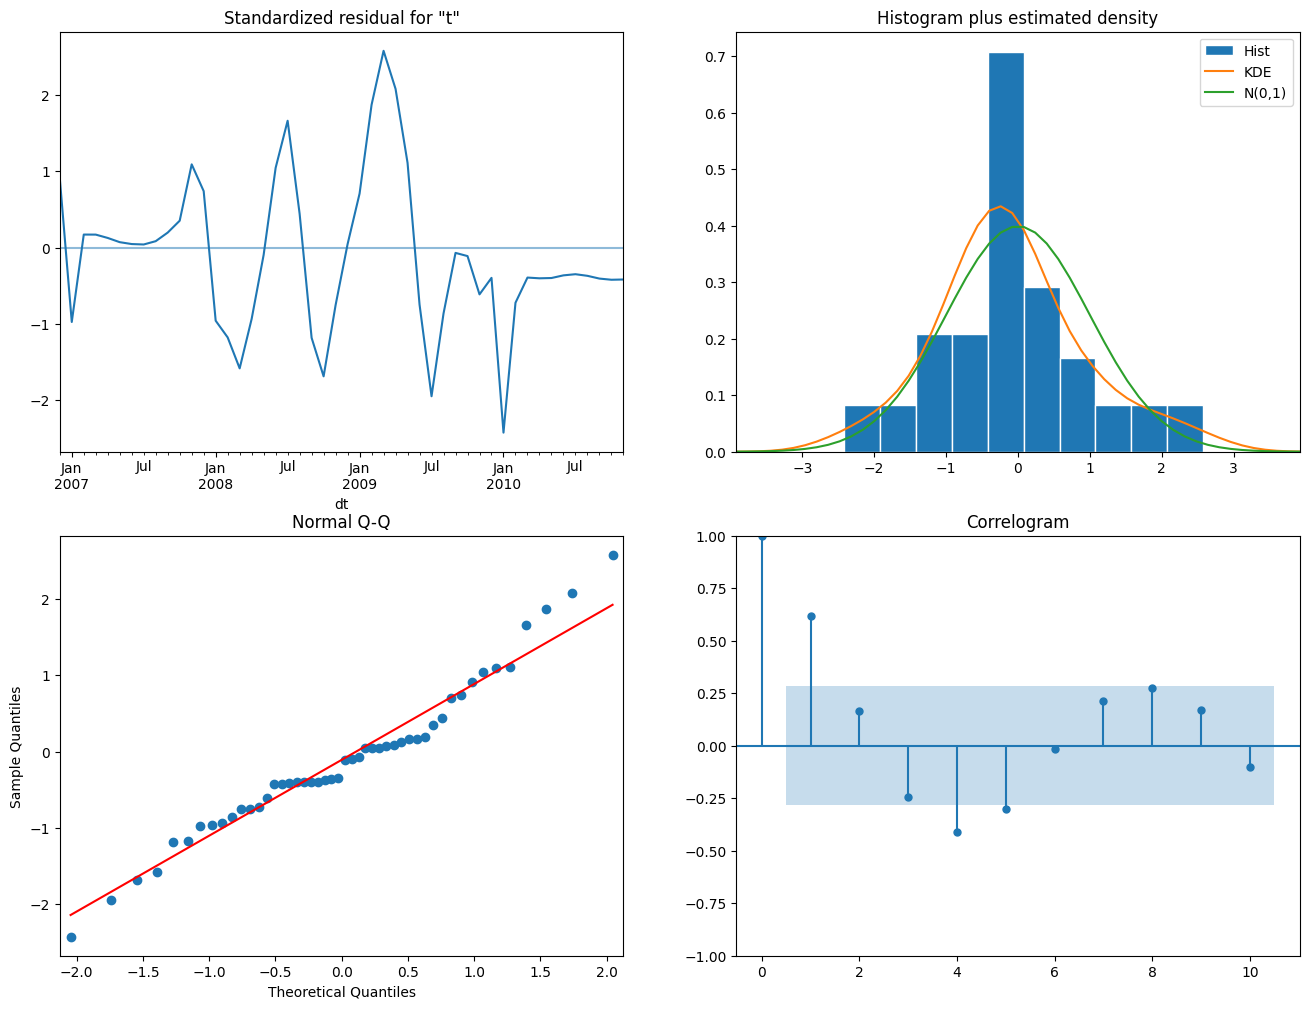

In [ ]:
plt.rcParams.update({'figure.figsize': (16, 12)})

from statsmodels.tsa.arima.model import ARIMA

data = stl_result.trend

q = 0
arima_model = ARIMA(data, order=(2, 0, q))
arima_result = arima_model.fit()

arima_result.plot_diagnostics()

print(arima_result.summary())

from sklearn.metrics import mean_squared_error, r2_score
import math

predictions = arima_result.predict()
rmse = math.sqrt(mean_squared_error(data, predictions))
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2_score(data, predictions):.2f}")

**Performance Metrics**:
- RMSE (Root Mean Squared Error): The RMSE value of 13.19 indicates the average magnitude of error in predicting the trend component of household consumption.
- R-squared (R2): The R-squared value of 0.90 suggests that the model explains approximately 90% of the variance in the trend component of household consumption, indicating a good fit.
**Model Fit**: The ARIMA model with parameters (2, 0, 0) appears to fit the trend component of household energy consumption well, as indicated by the high R-squared value.

In [ ]:
from pmdarima.arima import auto_arima

data = monthly_df['Global_active_power']

auto_arima_model = auto_arima(data, seasonal=True, m=12)

print(auto_arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -333.671
Date:                            Tue, 02 Jul 2024   AIC                            677.343
Time:                                    16:15:15   BIC                            686.699
Sample:                                12-31-2006   HQIC                           680.879
                                     - 11-30-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    220.4541     95.318      2.313      0.021      33.634     407.274
ar.L1          0.4184      0.151   

                                    SARIMAX Results                                     
Dep. Variable:              Global_active_power   No. Observations:                   48
Model:             ARIMA(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -333.390
Date:                          Tue, 02 Jul 2024   AIC                            676.779
Time:                                  16:15:19   BIC                            686.135
Sample:                              12-31-2006   HQIC                           680.315
                                   - 11-30-2010                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1565.0646    126.080     12.413      0.000    1317.953    1812.176
ar.L1          0.3328      0.172      1.937      0.

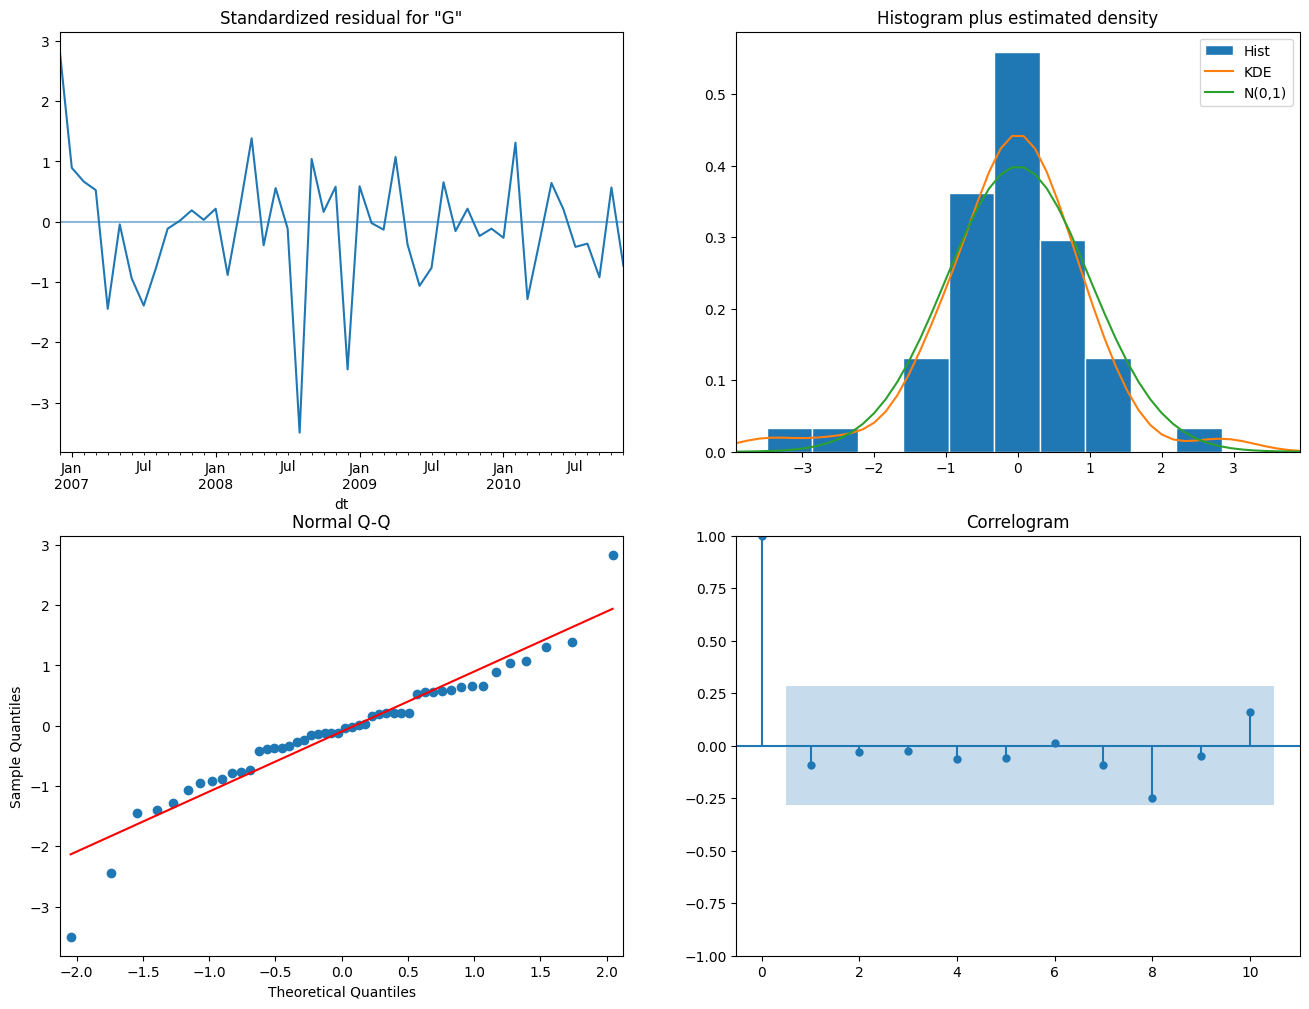

In [ ]:
plt.rcParams.update({'figure.figsize': (16, 12)})

from statsmodels.tsa.arima.model import ARIMA

data = monthly_df['Global_active_power']

arima_model = ARIMA(data, order=auto_arima_model.order, seasonal_order=auto_arima_model.seasonal_order)
arima_result = arima_model.fit()

arima_result.plot_diagnostics()

print(arima_result.summary())

from sklearn.metrics import mean_squared_error, r2_score
import math

predictions = arima_result.predict()
rmse = math.sqrt(mean_squared_error(data, predictions))
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2_score(data, predictions):.2f}")

  **AR.S.L12** (Seasonal Auto-Regressive at lag 12): 0.9610
This coefficient represents the effect of the value observed 12 months ago on the current value of the series, capturing yearly seasonality.
  **MA.S.L12** (Seasonal Moving Average at lag 12): -0.6093
This coefficient represents the weighted effect of the seasonal forecast error from 12 months ago on the current value of the series.
  **Model Fit**: The ARIMA model with parameters (1, 0, 0)x(1, 0, 1, 12) appears to capture both the auto-regressive dynamics and the seasonal component of household energy consumption well, based on the significant coefficients.
  **Forecasting: **This model can be used to forecast future trends in energy consumption, aiding in household planning and management.

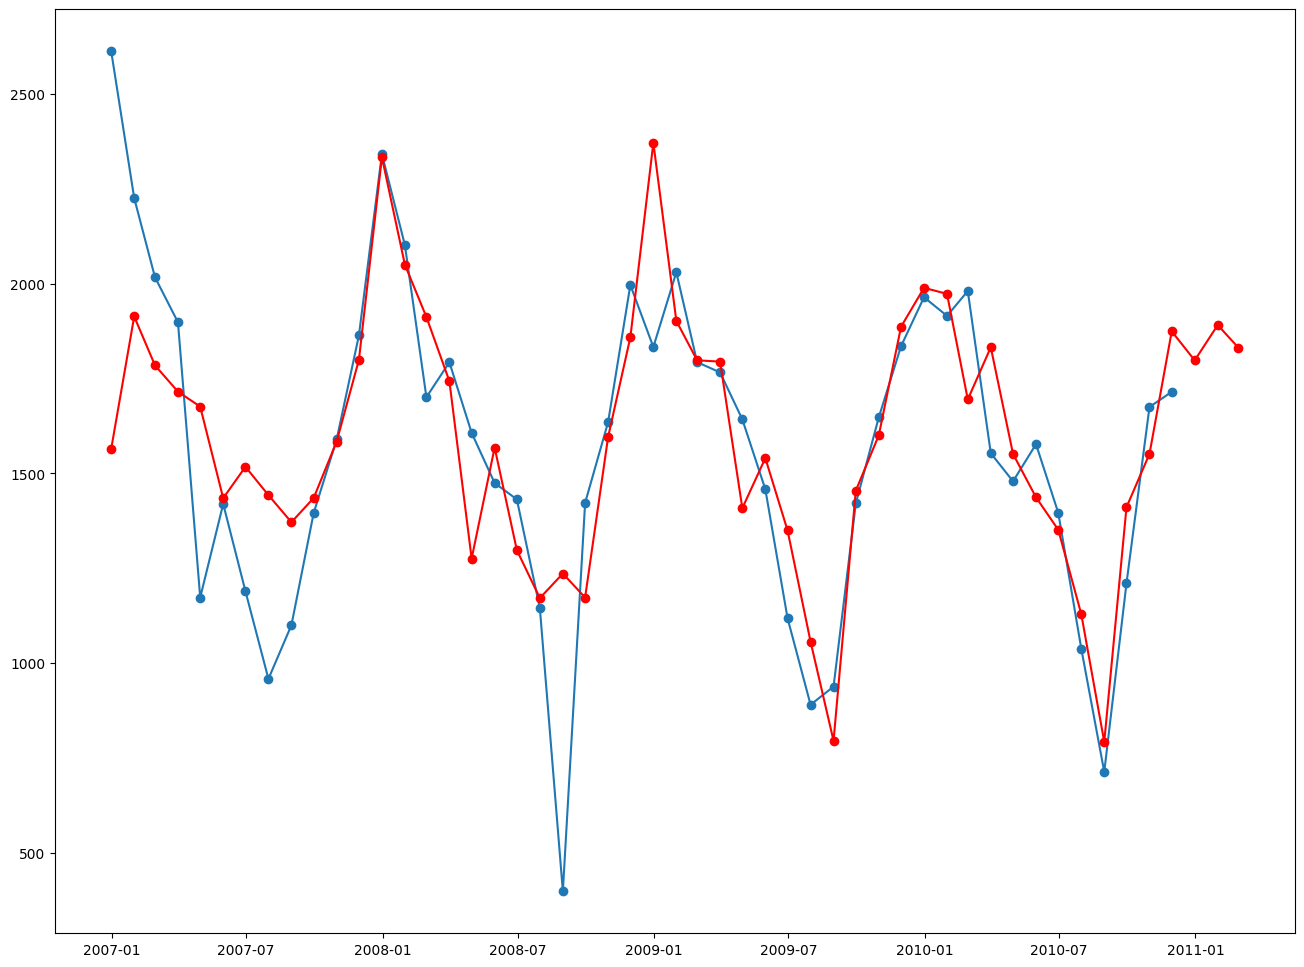

In [ ]:
#making predictions

import datetime

start_date = data.index.min()
end_date = data.index.max() + datetime.timedelta(90)

predictions = arima_result.predict(start=start_date, end=end_date)

plt.plot(data, marker='o')
plt.plot(predictions, color='red', marker='o')

- The model explains how well the predicted values align with the actual data.The predicted values (red line) should closely follow the observed data (blue line).
- There is small deviations over a long period of time explaining that the model explains the true variability in household consumption with the Arima model.

In [ ]:
# Import product function from itertools
from itertools import product
# Define the ranges for hyperparameter search
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1, 2]
D_values = [0, 1]
Q_values = [0, 1, 2]
S_values = [12]

# Generate all possible combinations of hyperparameters
param_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, S_values))

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from math import sqrt
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

params_mean_rmse = {}

for combination_idx in range(len(param_combinations)):
    # Number of folds for time series cross-validation
    n_splits = 5
    fold_size = len(data) // n_splits

    rmse_fold_wise = []
    for i in range(n_splits):
        start_idx = 0
        end_idx = i * fold_size + fold_size
        test_size = 3

        train = data[start_idx: end_idx]
        test = data[end_idx: end_idx + test_size]

        sarima_model = SARIMAX(train,
                           order=param_combinations[combination_idx][:3],
                           seasonal_order=param_combinations[combination_idx][3:], enforce_stationarity=False)
        sarima_result = sarima_model.fit(disp=False)
        predictions = sarima_result.get_prediction(start=test.index[0], end=test.index[-1])
        predicted_values = predictions.predicted_mean

        if predicted_values.isna().sum() == 0:
            rmse = sqrt(mean_squared_error(test, predicted_values))
            rmse_fold_wise.append(rmse)
        else:
            print(param_combinations[combination_idx], i)
    params_mean_rmse[param_combinations[combination_idx]] = np.mean(rmse_fold_wise)

params_mean_rmse

(0, 0, 0, 1, 1, 0, 12) 0
(0, 0, 0, 2, 1, 0, 12) 0
(0, 1, 0, 1, 1, 0, 12) 0
(0, 1, 0, 2, 1, 0, 12) 0
(1, 0, 0, 0, 1, 0, 12) 0
(1, 0, 0, 0, 1, 1, 12) 0
(1, 0, 0, 0, 1, 2, 12) 0
(1, 0, 0, 1, 1, 0, 12) 0
(1, 0, 0, 1, 1, 1, 12) 0
(1, 0, 0, 1, 1, 2, 12) 0
(1, 0, 0, 2, 1, 0, 12) 0
(1, 0, 0, 2, 1, 1, 12) 0
(1, 0, 0, 2, 1, 2, 12) 0
(1, 1, 0, 0, 1, 0, 12) 0
(1, 1, 0, 0, 1, 1, 12) 0
(1, 1, 0, 0, 1, 2, 12) 0
(1, 1, 0, 1, 1, 0, 12) 0
(1, 1, 0, 1, 1, 1, 12) 0
(1, 1, 0, 1, 1, 2, 12) 0
(1, 1, 0, 2, 1, 0, 12) 0
(1, 1, 0, 2, 1, 1, 12) 0
(1, 1, 0, 2, 1, 2, 12) 0
(2, 0, 0, 0, 1, 0, 12) 0
(2, 0, 0, 0, 1, 1, 12) 0
(2, 0, 0, 0, 1, 2, 12) 0
(2, 0, 0, 1, 1, 0, 12) 0
(2, 0, 0, 1, 1, 1, 12) 0
(2, 0, 0, 1, 1, 2, 12) 0
(2, 0, 0, 2, 1, 0, 12) 0
(2, 0, 0, 2, 1, 1, 12) 0
(2, 0, 0, 2, 1, 2, 12) 0
(2, 1, 0, 0, 1, 0, 12) 0
(2, 1, 0, 0, 1, 1, 12) 0
(2, 1, 0, 0, 1, 2, 12) 0
(2, 1, 0, 1, 1, 0, 12) 0
(2, 1, 0, 1, 1, 1, 12) 0
(2, 1, 0, 1, 1, 2, 12) 0
(2, 1, 0, 2, 1, 0, 12) 0
(2, 1, 0, 2, 1, 1, 12) 0
(2, 1, 0, 2, 1, 2, 12) 0


{(0, 0, 0, 0, 0, 0, 12): 1568.5161696668504,
 (0, 0, 0, 0, 0, 1, 12): 1051.7420944044661,
 (0, 0, 0, 0, 0, 2, 12): 992.827652383669,
 (0, 0, 0, 0, 1, 0, 12): 477.1868999610689,
 (0, 0, 0, 0, 1, 1, 12): 491.7109311075289,
 (0, 0, 0, 0, 1, 2, 12): 482.51651894225745,
 (0, 0, 0, 1, 0, 0, 12): 491.3132518988409,
 (0, 0, 0, 1, 0, 1, 12): 479.16973675712245,
 (0, 0, 0, 1, 0, 2, 12): 625.2966332280887,
 (0, 0, 0, 1, 1, 0, 12): 225.6944438370322,
 (0, 0, 0, 1, 1, 1, 12): 500.69351231796384,
 (0, 0, 0, 1, 1, 2, 12): 482.84308651854207,
 (0, 0, 0, 2, 0, 0, 12): 674.8145812945456,
 (0, 0, 0, 2, 0, 1, 12): 686.1347293408378,
 (0, 0, 0, 2, 0, 2, 12): 664.6566726283489,
 (0, 0, 0, 2, 1, 0, 12): 194.89839701389985,
 (0, 0, 0, 2, 1, 1, 12): 478.015816217133,
 (0, 0, 0, 2, 1, 2, 12): 479.68957171813133,
 (0, 0, 1, 0, 0, 0, 12): 1399.9514550580789,
 (0, 0, 1, 0, 0, 1, 12): 1013.3659591380641,
 (0, 0, 1, 0, 0, 2, 12): 1037.1572067853413,
 (0, 0, 1, 0, 1, 0, 12): 487.12956912074685,
 (0, 0, 1, 0, 1, 1, 12

In [ ]:
result = pd.DataFrame(data=[params_mean_rmse.keys(), params_mean_rmse.values()]).T
result.columns = ['param', 'rmse']
result.sort_values('rmse').head()

param        rmse
111  (1, 0, 0, 0, 1, 0, 12)  190.041168
124  (1, 0, 0, 2, 1, 1, 12)  190.885835
125  (1, 0, 0, 2, 1, 2, 12)  190.894348
113  (1, 0, 0, 0, 1, 2, 12)  194.235416
119  (1, 0, 0, 1, 1, 2, 12)  194.522204

- The combination (1, 0, 0, 0, 1, 0, 12) has the lowest RMSE of 190.041168, indicating that this model provides the best fit among the tested configurations. This suggests that using an AR(1) term along with a seasonal AR(1) term with no differencing or MA terms is effective for this dataset.

**Plotting using best parameter**

In [ ]:
best_params = (1, 0, 0, 0, 1, 0, 12)

train = data

selected_sarima_model = SARIMAX(train,
                   order=best_params[:3],
                   seasonal_order=best_params[3:], enforce_stationarity=False)
sarima_result = selected_sarima_model.fit()

start_date = data.index.min()
end_date = data.index.max() + datetime.timedelta(170)
predictions = sarima_result.predict(start=start_date, end=end_date)

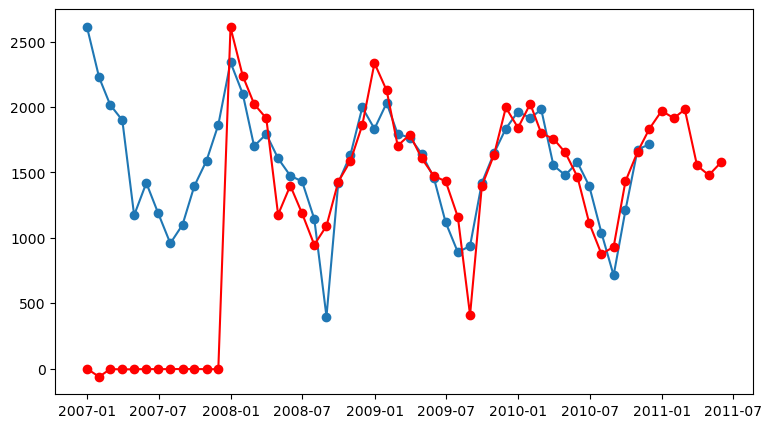

In [ ]:
plt.rcParams['figure.figsize'] = [9, 5]

plt.plot(data, marker='o')
plt.plot(predictions, color='red', marker='o')
plt.show()

- The other combinations have slightly higher RMSE values, indicating that including additional AR terms, MA terms, or seasonal MA terms did not significantly improve the model's performance.
- For instance, adding more seasonal MA terms (like in (1, 0, 0, 2, 1, 1, 12) or (1, 0, 0, 2, 1, 2, 12)) resulted in a small increase in RMSE, suggesting that these additional parameters did not capture much more of the underlying patterns in the data and might even have introduced some overfitting.

- The hyperparameter tuning process has identified (1, 0, 0, 0, 1, 0, 12) as the best model for predicting household electricity consumption based on the lowest RMSE. This indicates that this model configuration effectively balances complexity and fit, capturing the essential seasonal and autoregressive components without overfitting.

In [ ]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Global_active_power   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -241.661
Date:                            Tue, 02 Jul 2024   AIC                            487.323
Time:                                    03:40:15   BIC                            490.433
Sample:                                12-31-2006   HQIC                           488.396
                                     - 11-30-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0473      0.306     -0.155      0.877      -0.646       0.552
sigma2      5.818e+04   1.62e+04      3.589      0.000    2.64e+04       9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.20
Prob(Q):                              0.80   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                            -0.27
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Coefficient Interpretation**:

- ar.L1:
The coefficient for the autoregressive term (AR(1)) is -0.0473, but it is not statistically significant as indicated by the high p-value (0.877). This suggests that past values of the series do not significantly influence current values after accounting for seasonal effects.
- sigma2:
Represents the variance of the residuals (errors) of the model. Here, it is 5.818e+04, indicating the variability of the observed data around the model's predictions.

**Diagnostic Tests:**

- Ljung-Box (L1.
Tests for the absence of serial correlation in the residuals. A small p-value (0.06) suggests that there may be some residual autocorrelation at lag 1.
- Jarque-Bera (JB)
Tests the skewness and kurtosis of the residuals against a normal distribution. A higher p-value (0.55) indicates that the residuals are likely normally distributed.
- Heteroskedasticity (H)
 Tests for the presence of non-constant variance in the residuals. A p-value of 0.05 suggests marginal evidence of heteroskedasticity.
 **Model Utility:**
 The SARIMAX model provides a framework to forecast future global active power consumption based on historical data. Despite the non-significant AR(1) coefficient, the model captures seasonal patterns (D=1), indicating a one-period difference at lag 12

**Interpretation and Advice**

- Both models(SARIMA& ARIMA) have very similar log likelihood, AIC, and BIC values, indicating they fit the data similarly well. However, given the seasonal nature of electricity consumption data (which typically exhibits yearly patterns), the SARIMA model (which incorporates seasonal components) might be more appropriate.

**Why chose SARIMA over ARIMA**

-1)Seasonality Handling: SARIMA explicitly models seasonal components, which can capture the periodic patterns in electricity consumption data better than non-seasonal ARIMA.

-2)Prediction Accuracy: SARIMA models are designed to handle seasonal data, providing potentially more accurate forecasts when the data exhibits clear seasonal patterns.

-3) Model Complexity: While SARIMA introduces more parameters (seasonal AR and MA terms), it appropriately models the seasonal variations, potentially leading to better forecasts.

- Based on the provided results and typical characteristics of electricity consumption data, SARIMA would generally be the recommended model to proceed with for predicting electricity consumption.






